The research question you intend to answer - The popularity of e-commerce has grown significantly, with customers increasingly choosing to shop online instead of in physical stores. The lack of face-to-face interaction and the abundance of online options can lead to customers needing to be more focused. This presents a unique opportunity for e-commerce to enhance the overall customer experience.

Your expected data source - https://www.kaggle.com/datasets/adityawisnugrahas/eshop-clothing-dataset

The techniques you expect to use in your analysis - Clustering, Regression, and Classification. 

The expected results - This study aims to examine customer behavior and uncover customer preferences, buying habits, and market trends. 

Why this question is important - The insights gained from this analysis will allow e-commerce to tailor their websites and products to meet their customers needs better.

In [1]:
import pandas as pd
import numpy as np

#Plotting library
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [254]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Clothing dataset

df = pd.read_csv('/Users/mma0812/Downloads/e-shop clothing 2008.csv', delimiter=';')

In [3]:
df.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

The dataset consists of 14 features, and except for column page 2, all other seems to be numerical columns. That makes the preparation of the model easy. However, categorical columns can better help in understanding the data. 

In [5]:
df.describe()

year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                1.144420       4.235606       1.713206   
min         1.000000                1.000000       1.000000       1.000000   
25%      5931.000000                1.000000       3.000000       2.000000   
50%     11967.500000                2.000000       4.000000       3.000000   
75%     18219.000000                3.000000       9.000000       5.000000   
max     24026.000000                4.000000      14.000000       6.000000   

       model photography          price        price 2           page  
count      165474.000000  165474.000000  165474.000000  165474.000000  
mean            1.260071      43.802507       1.488167       1.710166  
std             0.438674      12.548131       0.499861       0.982412  
min             1.000000      18.000000       1.000000       1.000000  
25%             1.000000      33.000000       1.000000       1.000000  
50%             1.000000      43.000000       1.000000       1.000000  
75%             2.000000      52.000000       2.000000       2.000000  
max             2.000000      82.000000       2.000000       5.000000

## -----EDA Starts----- 

### Correlation Matrix 

In [6]:
# heatmap of correlation matrix
corr = df.corr()
corr.iloc[1:, 1:]

month       day     order   country  session ID  \
month                   1.000000 -0.075098  0.026093  0.065502    0.970961   
day                    -0.075098  1.000000 -0.021744  0.011551    0.161369   
order                   0.026093 -0.021744  1.000000 -0.064709    0.021829   
country                 0.065502  0.011551 -0.064709  1.000000    0.065869   
session ID              0.970961  0.161369  0.021829  0.065869    1.000000   
page 1 (main category)  0.017557 -0.001251  0.151693  0.132817    0.016123   
colour                 -0.035279  0.005313  0.046427  0.009789   -0.032034   
location               -0.017712  0.000596  0.014854 -0.009072   -0.016721   
model photography       0.011102 -0.000211  0.061820  0.028725    0.010585   
price                   0.012700 -0.002818 -0.064779 -0.045345    0.011669   
price 2                -0.014658  0.004254  0.000772 -0.017536   -0.012742   
page                    0.020898  0.011125  0.204106  0.026695    0.023254   

                        page 1 (main category)    colour  location  \
month                                 0.017557 -0.035279 -0.017712   
day                                  -0.001251  0.005313  0.000596   
order                                 0.151693  0.046427  0.014854   
country                               0.132817  0.009789 -0.009072   
session ID                            0.016123 -0.032034 -0.016721   
page 1 (main category)                1.000000  0.230577  0.015939   
colour                                0.230577  1.000000  0.042062   
location                              0.015939  0.042062  1.000000   
model photography                     0.213113  0.074755  0.067678   
price                                -0.364791 -0.091159 -0.084653   
price 2                              -0.137944 -0.080147  0.073187   
page                                  0.347992  0.249322 -0.091865   

                        model photography     price   price 2      page  
month                            0.011102  0.012700 -0.014658  0.020898  
day                             -0.000211 -0.002818  0.004254  0.011125  
order                            0.061820 -0.064779  0.000772  0.204106  
country                          0.028725 -0.045345 -0.017536  0.026695  
session ID                       0.010585  0.011669 -0.012742  0.023254  
page 1 (main category)           0.213113 -0.364791 -0.137944  0.347992  
colour                           0.074755 -0.091159 -0.080147  0.249322  
location                         0.067678 -0.084653  0.073187 -0.091865  
model photography                1.000000 -0.212395  0.072944  0.258315  
price                           -0.212395  1.000000 -0.743633 -0.150455  
price 2                          0.072944 -0.743633  1.000000  0.029984  
page                             0.258315 -0.150455  0.029984  1.000000

In [7]:
fig = px.imshow(corr.iloc[1:, 1:], text_auto=True, aspect="auto")
fig.update_xaxes(side="top")
fig.show()

* Strong positive correlation between month and session ID (0.97) 
* Price and price 2 seems to share negative correlation (-0.74). But why there is negative relation, I'm unsure for now. 
* price and page 1 (main category) negative relation.

In [8]:
# Create copy of dataset for further analysis. 
eshop = df.copy()

### Univariate Analysis

#### Month

In [9]:
# Map features to understand the distribution 
feature_map_month = {4: "April", 5: "May", 6: "June", 7: "July", 8: "August"}

In [10]:
eshop["month"] = eshop["month"].map(feature_map_month)

In [11]:
eshop[['month']].head()

month
0  April
1  April
2  April
3  April
4  April

<AxesSubplot:xlabel='month', ylabel='Count'>

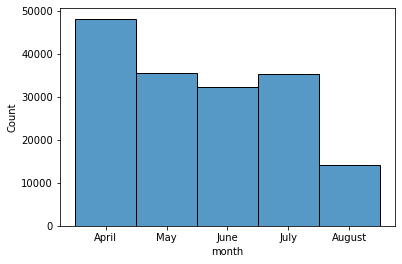

In [12]:
sns.histplot(eshop['month'])

The data collection spanned five months in 2008, with a relatively balanced data distribution. However, there is a slightly higher concentration of data from April.

#### Day

<AxesSubplot:xlabel='day', ylabel='Count'>

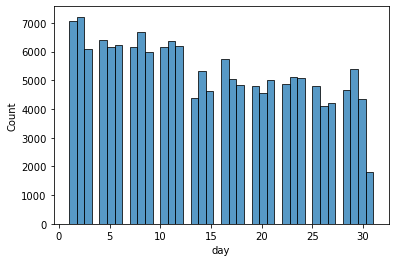

In [13]:
sns.histplot(eshop['day'], bins=40)

The data is relatively balanced throughout the month, with slight clustering towards the start of the month because people tend to have more money to spend at the beginning of the month. Although, we don't know if the customers visiting this website were salaried or self-employed. 

#### Order

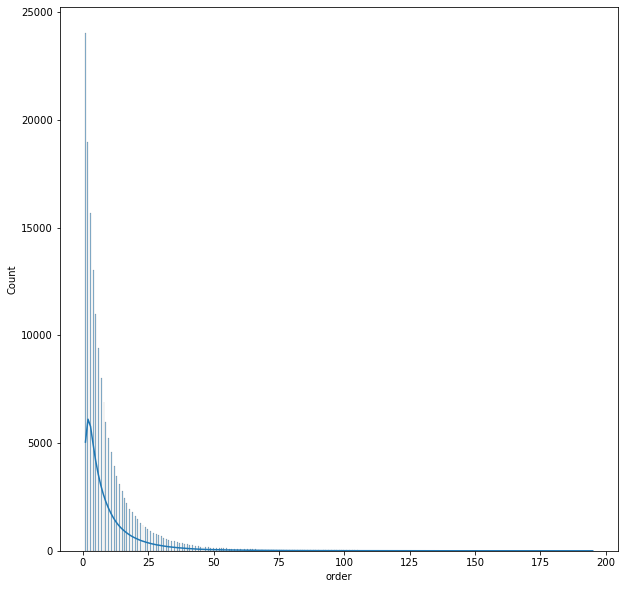

In [14]:
# Plot the distribution of the features

plt.figure(figsize=(10, 10))
sns.histplot(eshop['order'], kde=True)
plt.show()

I couldn't comprehend the distribution of this column. It shows the sequence of clicks during one session. However, why would the sequence of clicks go down, as shown in the graph? 
Another possible assumption could be that Order column represent the actual number of orders placed by the customers. 

#### Country

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (.biz) 44-com (.com)
45-int (.int) 46-net (.net)
47-org (*.org)

In [15]:
#feature_map_month = {4: "April", 5: "May", 6: "June", 7: "July", 8: "August"}
#eshop["month"] = eshop["month"].map(feature_map_month)

In [16]:
feature_map_country = {
    1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands", 5: "Cayman Islands", 
    6: "Christmas Island", 7: "Croatia", 8: "Cyprus", 9: "Czech Republic", 10: "Denmark", 11: "Estonia", 
    12: "unidentified", 13: "Faroe Islands", 14: "Finland", 15: "France", 16: "Germany", 17: "Greece", 18: "Hungary", 
    19: "Iceland", 20: "India", 21: "Ireland", 22: "Italy", 23: "Latvia", 24: "Lithuania", 25: "Luxembourg", 
    26: "Mexico", 27: "Netherlands", 28: "Norway", 29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia", 
    33: "San Marino", 34: "Slovakia", 35: "Slovenia", 36: "Spain", 37: "Sweden", 38: "Switzerland", 39: "Ukraine", 
    40: "United Arab Emirates", 41: "United Kingdom", 42: "USA", 43: "biz (.biz)", 44: "com (.com)", 
    45: "int (.int)", 46: "net (.net)", 47: "org (*.org)"
}

In [17]:
# Map the numerical value to its corresponding category using map function
eshop["country"] = eshop["country"].map(feature_map_country)

In [18]:
eshop["country"]

0                 Poland
1                 Poland
2                 Poland
3                 Poland
4                 Poland
               ...      
165469            Poland
165470    Czech Republic
165471          Slovakia
165472          Slovakia
165473          Slovakia
Name: country, Length: 165474, dtype: object

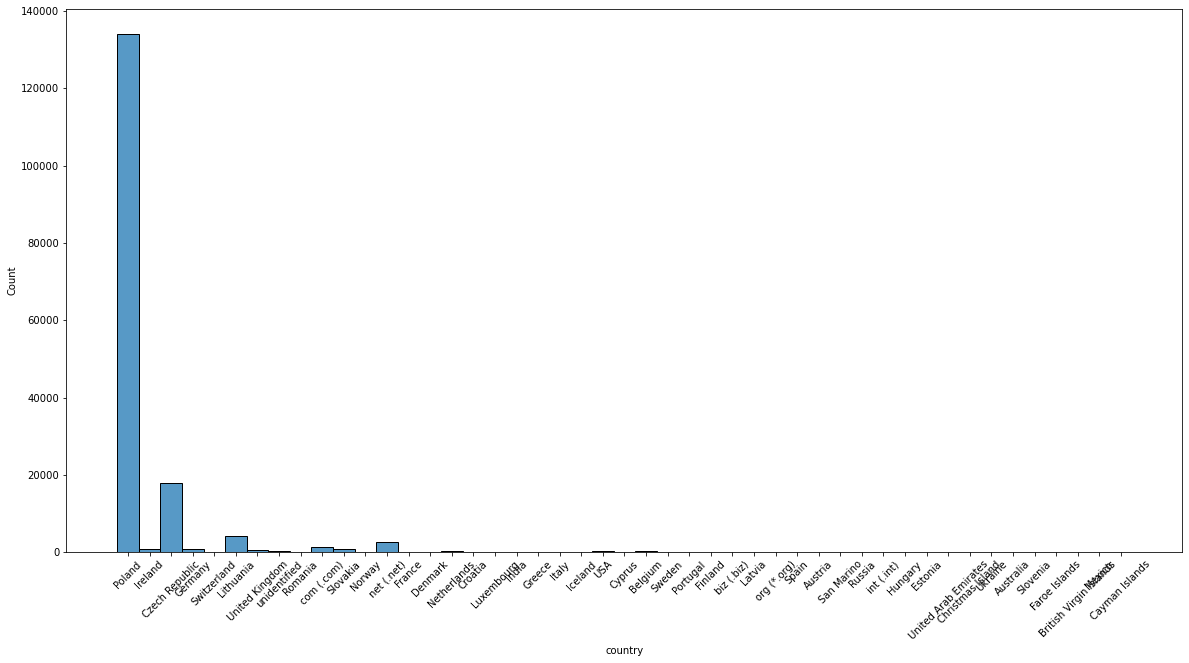

In [19]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['country'], multiple='stack')
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=9)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=9)
plt.show()

In [20]:
eshop[['country']].value_counts()

country               
Poland                    133963
Czech Republic             18003
Lithuania                   4091
net (.net)                  2522
com (.com)                  1385
Germany                      834
Ireland                      811
Slovakia                     716
United Kingdom               684
Belgium                      256
Netherlands                  227
unidentified                 210
USA                          170
Sweden                       163
Denmark                      152
Italy                        144
Romania                      144
Norway                       139
Switzerland                  137
France                       125
Estonia                      115
Luxembourg                    71
Austria                       58
Russia                        49
Latvia                        46
Finland                       43
Ukraine                       34
biz (.biz)                    31
Iceland                       29
Greece              

* Large concentration of data is noticeable in Poland and other European countries. 
* Countries outside of Europe have also seen E-shopping from this website, but the contribution is more negligible. 

#### Session Id - Variable indicating the session ID

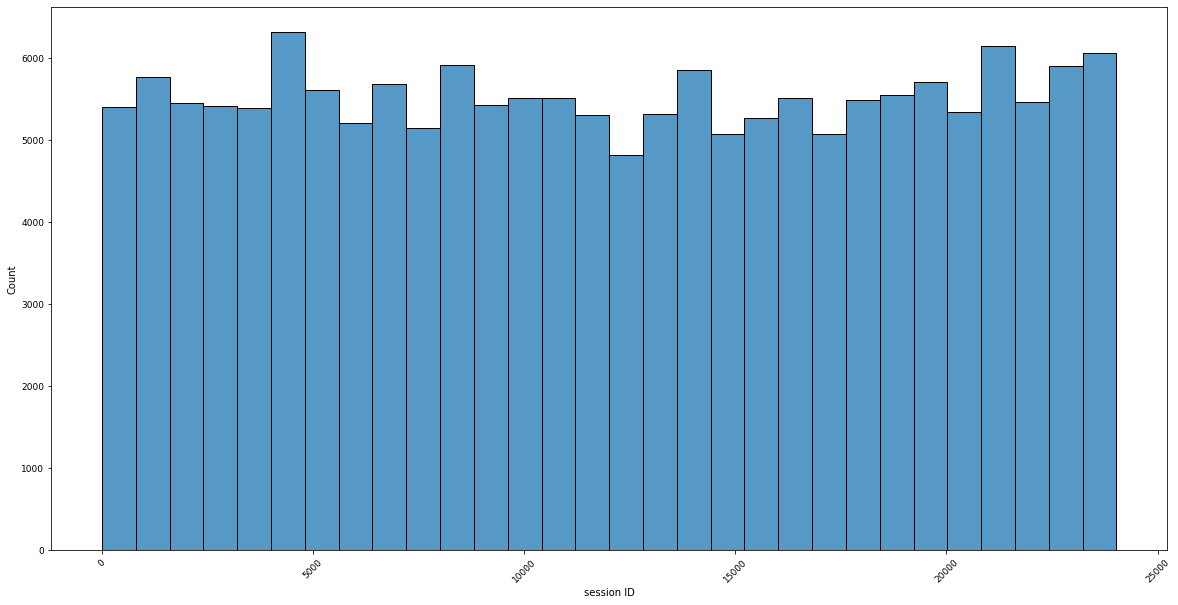

In [21]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['session ID'], bins=30)
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=9)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=9)
plt.show()

In [22]:
eshop[['session ID']].describe()

session ID
count  165474.000000
mean    12058.417056
std      7008.418903
min         1.000000
25%      5931.000000
50%     11967.500000
75%     18219.000000
max     24026.000000

* Session ID here may be considered the unique identity of the website users. Some websites generate it by incrementing the static numbers, so maybe that's why we see in this data that the session ids ranged widely across the different quartiles. 
* During the real-world clickstream analysis, the session ID may help identify the non-human visitor like bots. 

#### Page 1 (main category) - indicates the main product

In [23]:
feature_map_category1 = {
    1: "trousers", 2: "skirts", 3: "blouses", 4: "sale"
}

In [24]:
# Map the numerical value to its corresponding category using map function
eshop['page 1 (main category)'] = eshop['page 1 (main category)'].map(feature_map_category1)

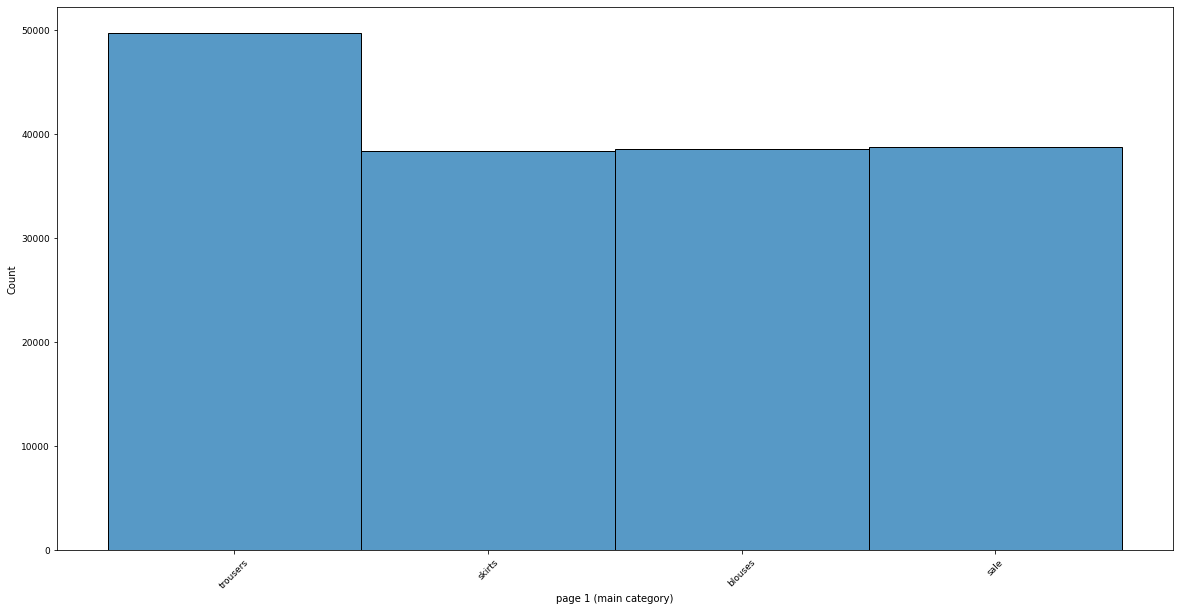

In [25]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['page 1 (main category)'])
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* Out of the main category, customers look more interested in trousers. (It could be both male and female that we don't know yet). 
* Concentration on skirts, blouses, and sale seems equivalent. Maybe, skirts and blouses are on sale along with other products. 

#### Page 2 (clothing model) - contains information about the code for each product (217 products)

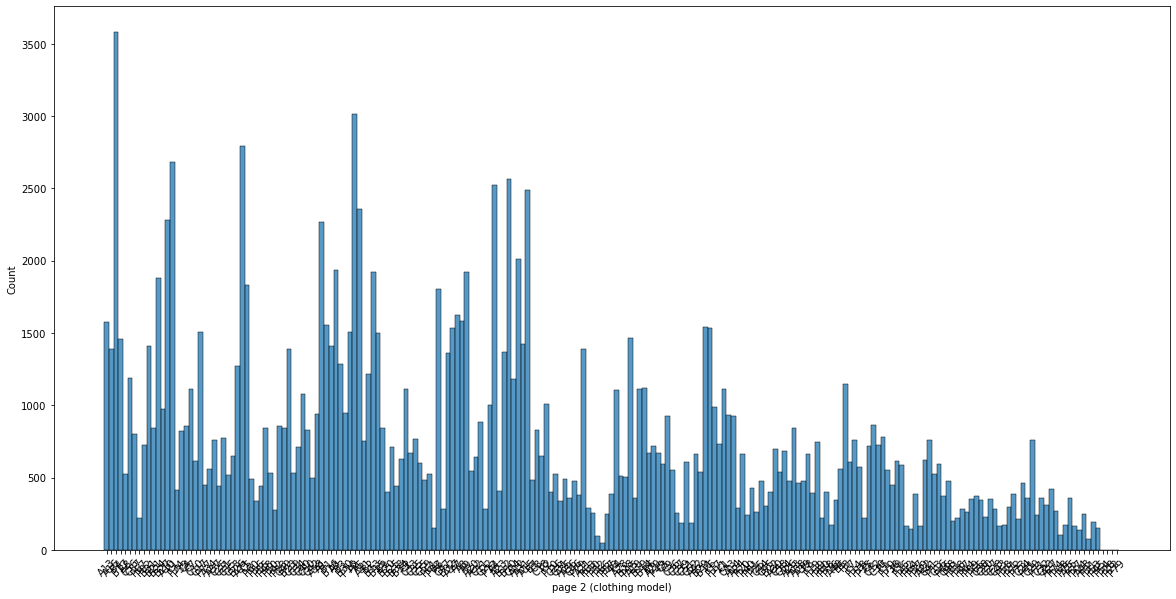

In [26]:
#page 2 (clothing model)

# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['page 2 (clothing model)'])
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

#### colour - variable indicating color of products 

In [27]:
feature_map_colour = {
1: "beige",
2: "black",
3: "blue",
4: "brown",
5: "burgundy",
6: "gray",
7: "green",
8: "navy blue",
9: "of many colors",
10: "olive",
11: "pink",
12: "red",
13: "violet",
14: "white"
}

In [28]:
# Map the numerical value to its corresponding category using map function
eshop['colour'] = eshop['colour'].map(feature_map_colour)

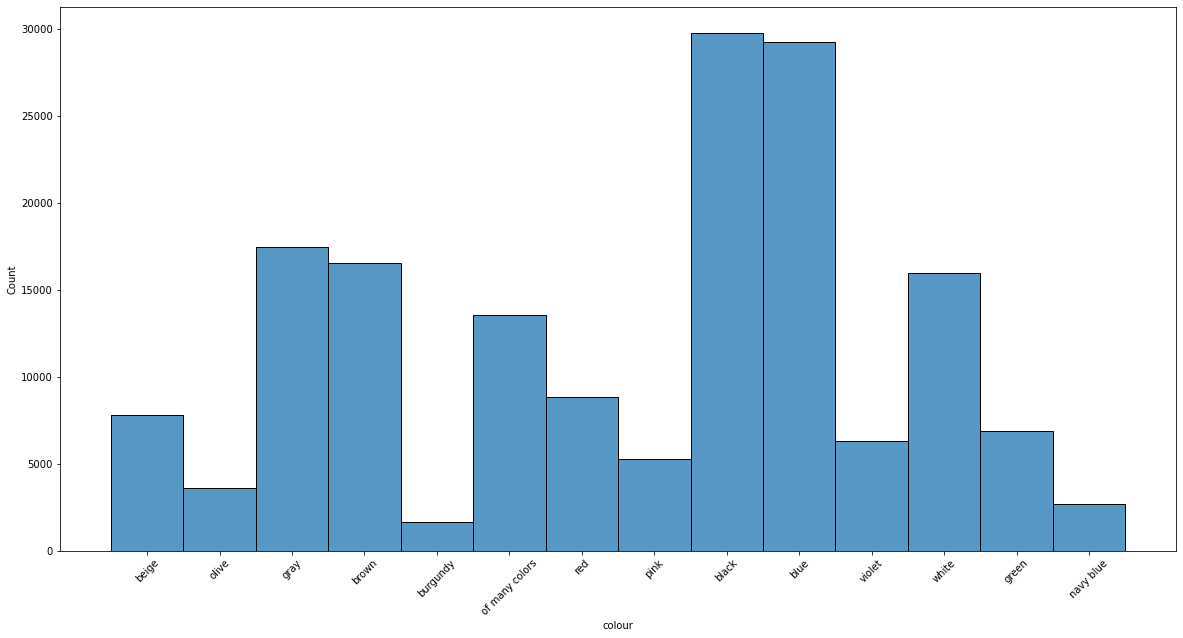

In [29]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['colour'])
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* Customers seem to be interested in neutral colors like black, blue, gray, white, and brown. 
* It may be an indication of higher sales of Trousers as, generally speaking, trousers are not fancy colors. 

#### Location - feature indicating the photo location on the page

In [30]:
# The screen has been divided into six parts

feature_map_location = {
    1: "top left",
2: "top in the middle",
3: "top right",
4: "bottom left",
5: "bottom in the middle",
6: "bottom right"
}

In [31]:
# Map the numerical value to its corresponding category using map function
eshop['location'] = eshop['location'].map(feature_map_location)

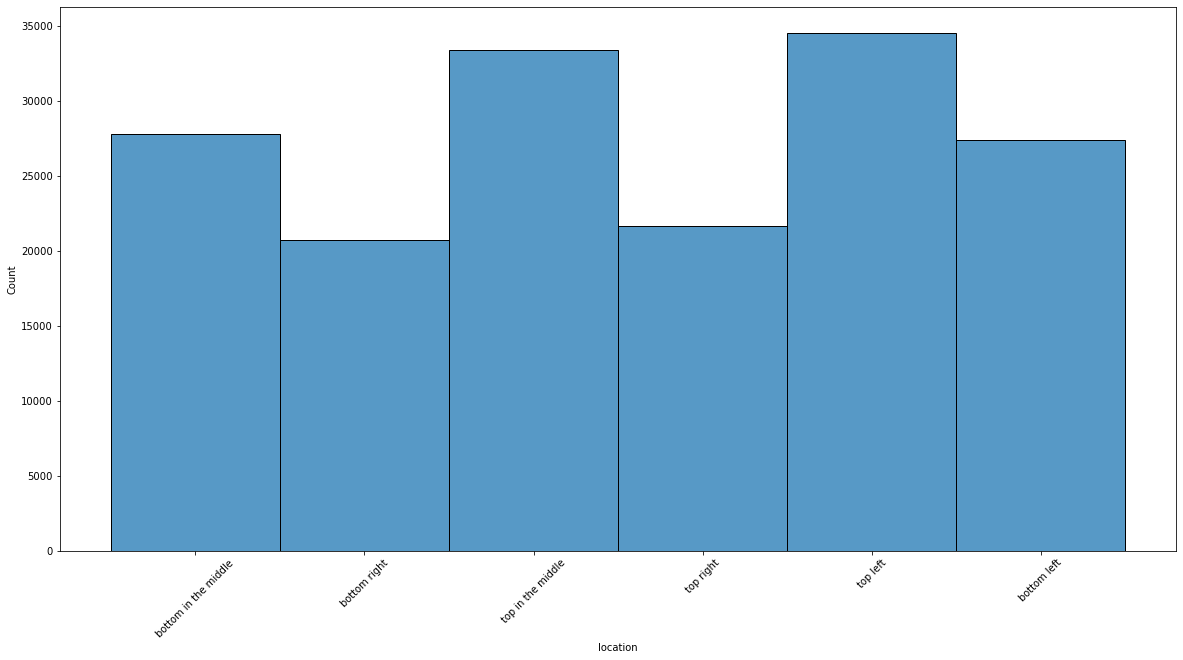

In [32]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['location'])
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* Placements of pictures matter a lot. Every time we visit the webpage, we look at the image first.
* An image at the top of the page captures more attention and draws subsequent actions. 

#### Model photography

In [33]:
# model photography with two categories 
feature_map_photo = {
    1: 'en face', 2: 'profile'
}

In [34]:
# Map the numerical value to its corresponding category using map function
eshop['model photography'] = eshop['model photography'].map(feature_map_photo)

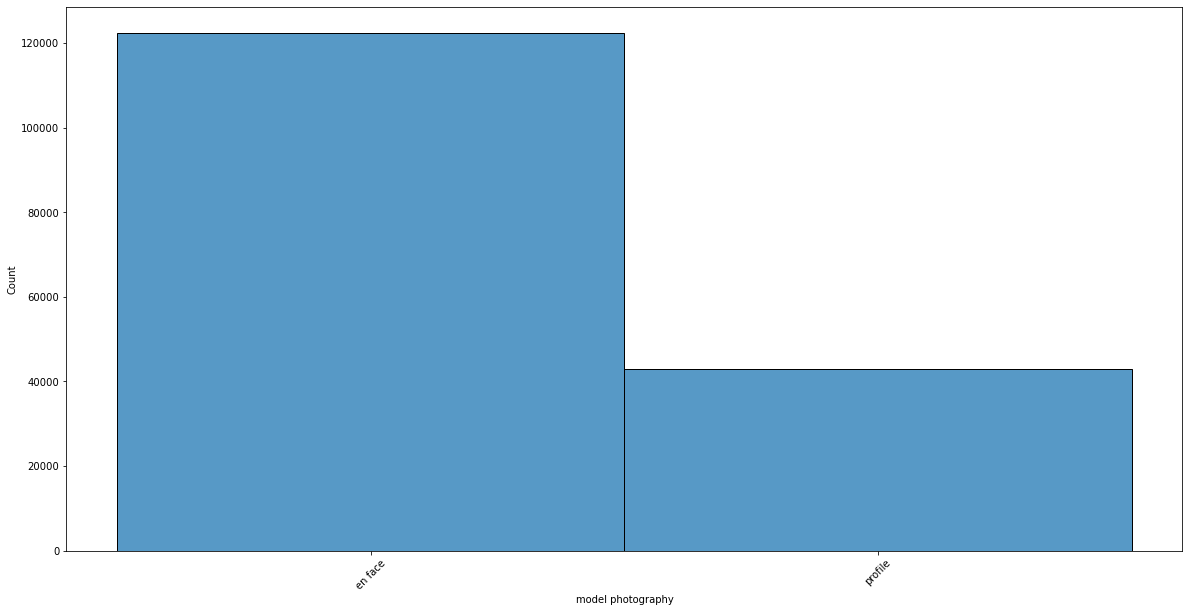

In [35]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['model photography'])
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

*  It's possible that the dataset contains images of models in different poses and that the "en face" and "profile" categories are used to help categorize these images.
* The model's orientation in a clothing photograph can make a difference in how customers perceive the clothing.
* En-face photos are more in the dataset than profile. Maybe the models photographed in an en-face position allow customers to see the clothing more clearly.

#### Price in US dollars

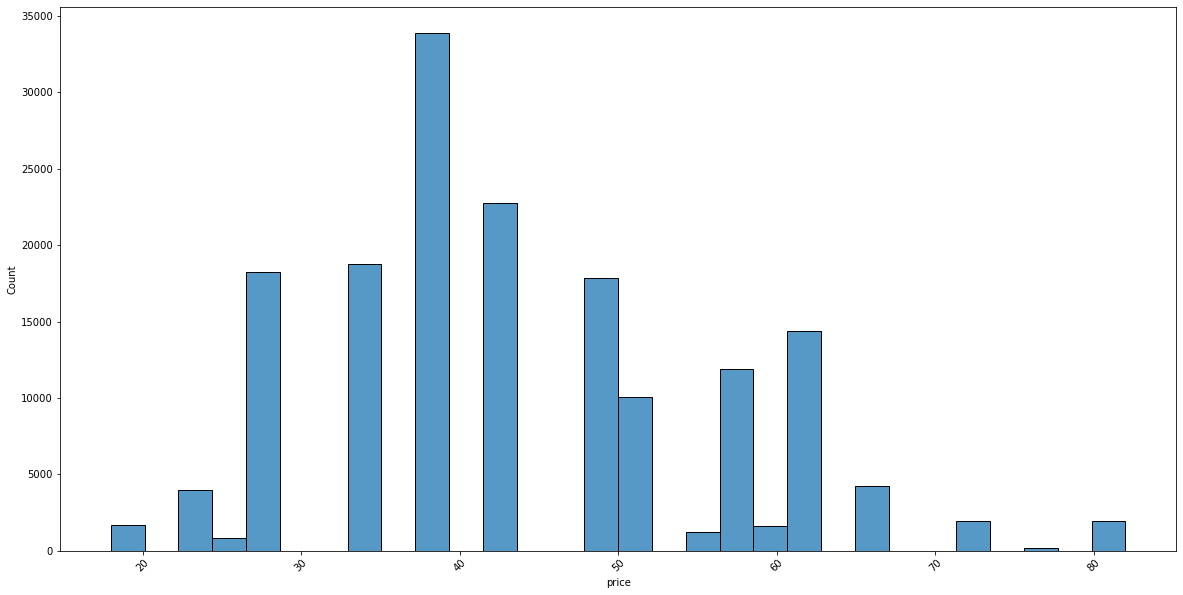

In [36]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['price'], bins=30)
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* The prices of items in the website is distributed between 20 to 80 dollars. 

#### PRICE 2 
variable informing whether the price of a particular product is higher than 
the average price for the entire product category

In [37]:
#eshop['price 2'] = df['price 2']

In [38]:
# price 2 with two categories 
feature_map_price2 = {
    1: 'yes', 2: 'no'
}

In [39]:
# Map the numerical value to its corresponding category using map function
eshop['price 2'] = eshop['price 2'].map(feature_map_price2)

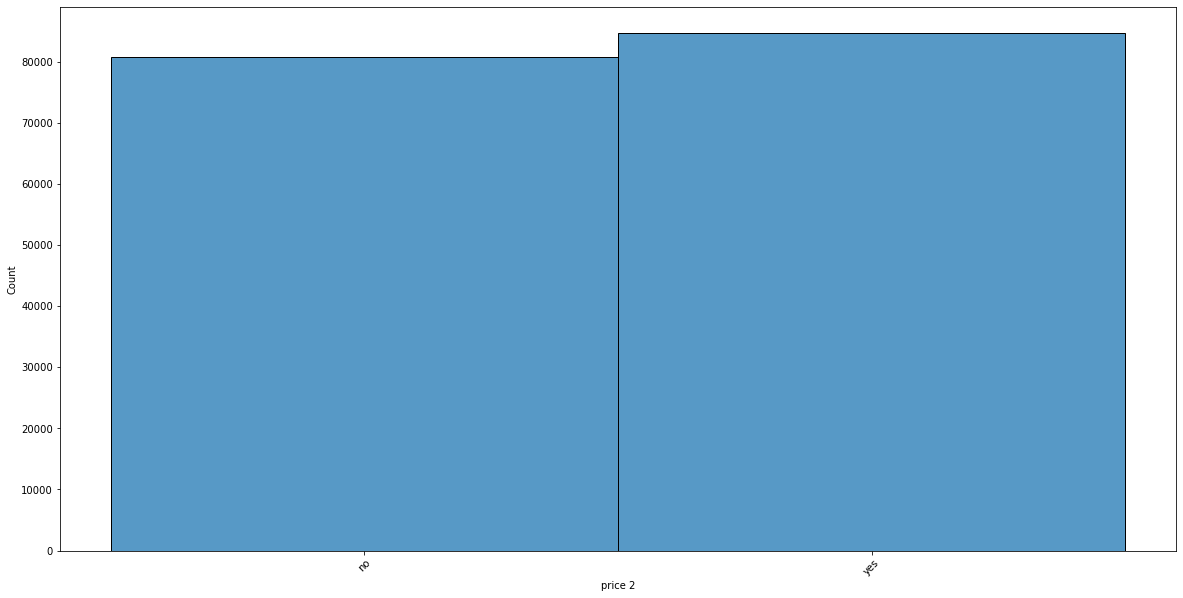

In [40]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['price 2'], bins=3)
#Set rotation for x tick
plt.xticks(rotation=45)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* The dataset is uniformly distributed between the two categories. 

#### PAGE

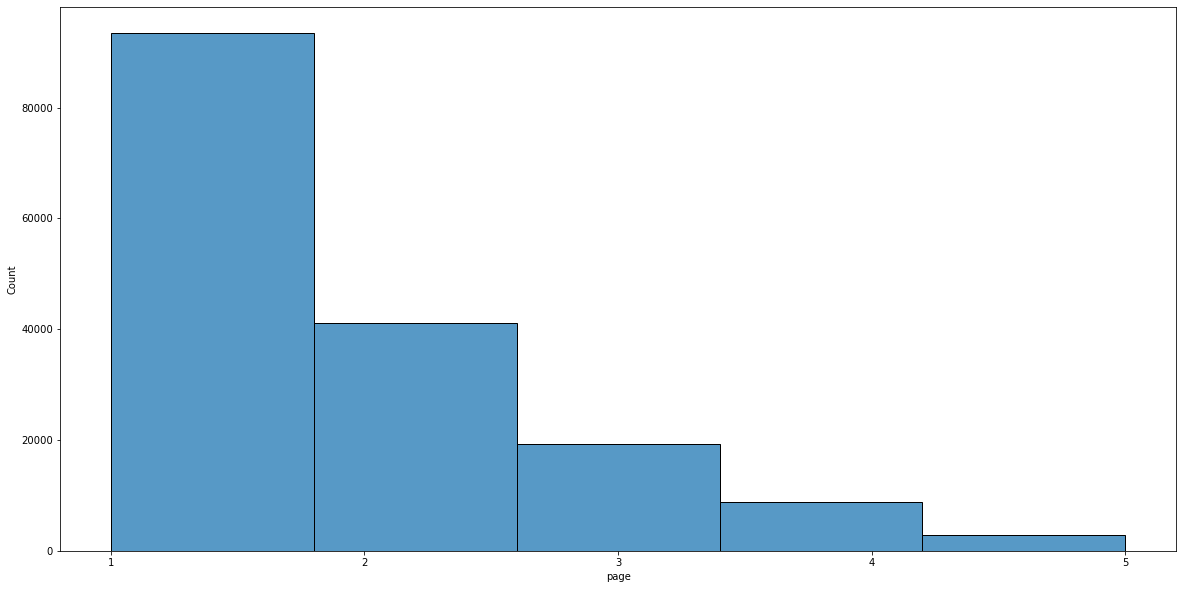

In [41]:
# Plot the distribution of the features

plt.figure(figsize=(20, 10))
sns.histplot(eshop['page'], bins=5)
#Set rotation for x tick
plt.xticks(np.arange(1, 6, 1))
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=10)
plt.show()

* There is a gradual decrease in the number of customers visiting the pages as they move from page 1 to page 5.

### Bivariate Analysis 

In [42]:
eshop.tail()

year   month  day  order         country  session ID  \
165469  2008  August   13      1          Poland       24024   
165470  2008  August   13      1  Czech Republic       24025   
165471  2008  August   13      1        Slovakia       24026   
165472  2008  August   13      2        Slovakia       24026   
165473  2008  August   13      3        Slovakia       24026   

       page 1 (main category) page 2 (clothing model) colour     location  \
165469                 skirts                     B10  black  bottom left   
165470               trousers                     A11   blue  bottom left   
165471               trousers                      A2   blue     top left   
165472                blouses                      C2    red     top left   
165473                 skirts                      B2   blue     top left   

       model photography  price price 2  page  
165469           en face     67     yes     1  
165470           en face     62     yes     1  
165471           en face     43      no     1  
165472           en face     43     yes     1  
165473           profile     57     yes     1

#### <b>Question</b> - Which country has most website visitor? 

In [43]:
eshop.head()

year  month  day  order country  session ID page 1 (main category)  \
0  2008  April    1      1  Poland           1               trousers   
1  2008  April    1      2  Poland           1               trousers   
2  2008  April    1      3  Poland           1                 skirts   
3  2008  April    1      4  Poland           1                 skirts   
4  2008  April    1      5  Poland           1                 skirts   

  page 2 (clothing model) colour              location model photography  \
0                     A13  beige  bottom in the middle           en face   
1                     A16  beige          bottom right           en face   
2                      B4  olive     top in the middle           en face   
3                     B17   gray          bottom right           profile   
4                      B8  brown             top right           profile   

   price price 2  page  
0     28      no     1  
1     33      no     1  
2     52     yes     1  
3     38      no     1  
4     52     yes     1

In [44]:
# Group by the country on session ID to find the number of visitors. Only consider the count > 50. 
eshop_visitor = eshop.groupby('country')[['session ID']].count()
eshop_visitor = eshop_visitor.sort_values(['session ID'], ascending=False)
eshop_visitor = eshop_visitor.rename(columns={"session ID": "sessionID"})
eshop_visitor = eshop_visitor.query('sessionID > 1000')
eshop_visitor.head()

sessionID
country                  
Poland             133963
Czech Republic      18003
Lithuania            4091
net (.net)           2522
com (.com)           1385

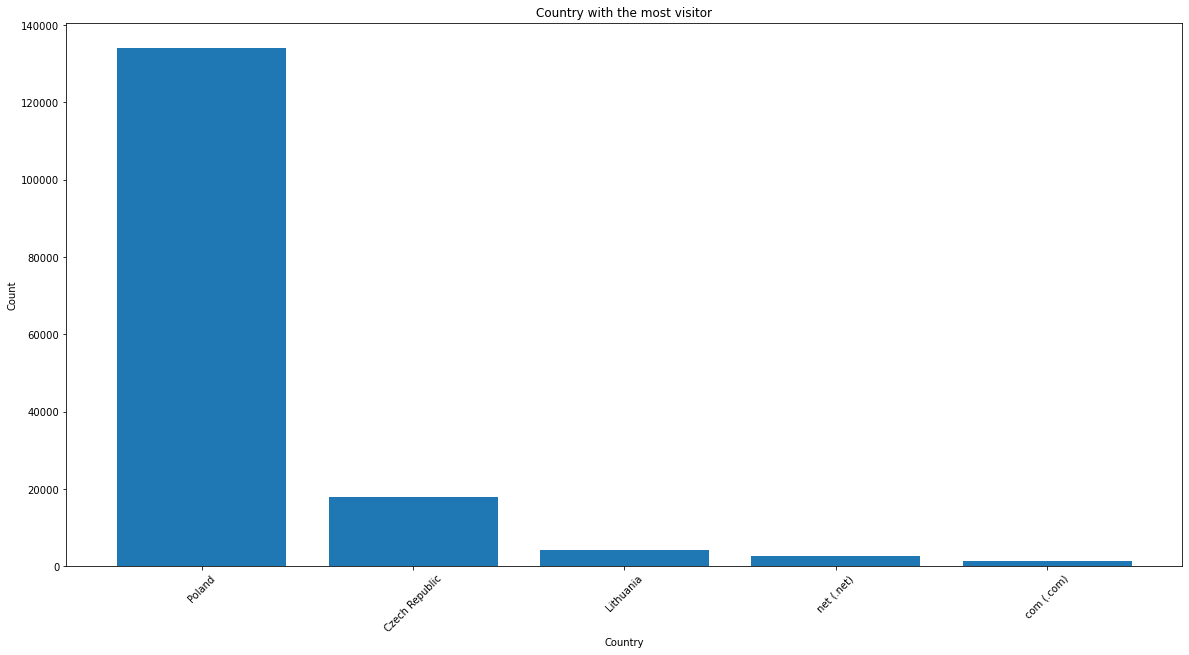

In [45]:
# Plot the distribution of country 

plt.figure(figsize=(20, 10))

# Create the second subplot using a bar plot
plt.bar(eshop_visitor.index, eshop_visitor['sessionID'])

# Add a main title for the figure
plt.title('Country with the most visitor')

# Add lables for the figure
plt.ylabel('Count')
plt.xlabel('Country')

# Rotate x axis ticks for better visualization
fig = plt.xticks(rotation=45)
plt.show()

<b>Conclusion</b> The website got most visitor from the European countries Poland, Czech Republic and Lithuania. 

#### <b>Question</b> - What is the relationship between main category and sales

In [46]:
eshop.head()

year  month  day  order country  session ID page 1 (main category)  \
0  2008  April    1      1  Poland           1               trousers   
1  2008  April    1      2  Poland           1               trousers   
2  2008  April    1      3  Poland           1                 skirts   
3  2008  April    1      4  Poland           1                 skirts   
4  2008  April    1      5  Poland           1                 skirts   

  page 2 (clothing model) colour              location model photography  \
0                     A13  beige  bottom in the middle           en face   
1                     A16  beige          bottom right           en face   
2                      B4  olive     top in the middle           en face   
3                     B17   gray          bottom right           profile   
4                      B8  brown             top right           profile   

   price price 2  page  
0     28      no     1  
1     33      no     1  
2     52     yes     1  
3     38      no     1  
4     52     yes     1

In [47]:
eshop_category_count = eshop.groupby("page 1 (main category)")[["price"]].count()
eshop_category_count.head()

price
page 1 (main category)       
blouses                 38577
sale                    38747
skirts                  38408
trousers                49742

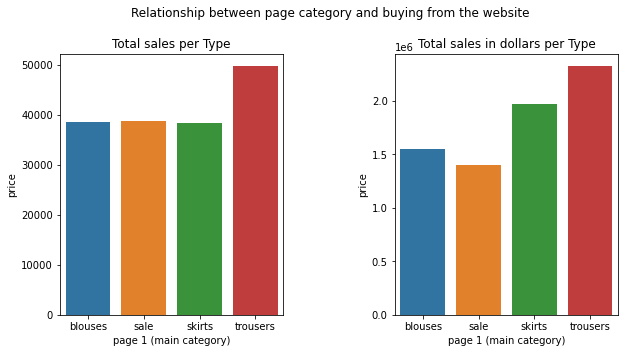

In [48]:
eshop_category_count = eshop.groupby("page 1 (main category)")[["price"]].count()
eshop_category_sum = eshop.groupby("page 1 (main category)")[["price"]].sum()

# Set up the figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Create the first subplot using a barplot chart
sns.barplot(x=eshop_category_count.index, y=eshop_category_count['price'], ax=ax[0])
ax[0].set_title("Total sales per Type")

# Create the second subplot using a barplot chart
sns.barplot(x=eshop_category_sum.index, y=eshop_category_sum['price'], ax=ax[1])
ax[1].set_title("Total sales in dollars per Type")

# Add space between the two subplots
fig.subplots_adjust(wspace=0.5)

# Add space between the title and the plots
fig.subplots_adjust(top=0.85)

# Add a main title for the figure
fig.suptitle("Relationship between page category and buying from the website")

# Show the plot
plt.show()

<b> Conclusion </b>
* Trousers are most purchased product from the website following the blouses, sale and skirts. 
* Trousers are generating more revenue following skirts and blouses.

#### Question - What is the revenue generated by different product colors? 
The answer may help the distributor make informed decisions regarding stocking up the right product with the right color.

In [49]:
eshop.head()

year  month  day  order country  session ID page 1 (main category)  \
0  2008  April    1      1  Poland           1               trousers   
1  2008  April    1      2  Poland           1               trousers   
2  2008  April    1      3  Poland           1                 skirts   
3  2008  April    1      4  Poland           1                 skirts   
4  2008  April    1      5  Poland           1                 skirts   

  page 2 (clothing model) colour              location model photography  \
0                     A13  beige  bottom in the middle           en face   
1                     A16  beige          bottom right           en face   
2                      B4  olive     top in the middle           en face   
3                     B17   gray          bottom right           profile   
4                      B8  brown             top right           profile   

   price price 2  page  
0     28      no     1  
1     33      no     1  
2     52     yes     1  
3     38      no     1  
4     52     yes     1

In [50]:
df1 = eshop.groupby(['page 1 (main category)', 'colour'])[['price']].count()
df1.head()

price
page 1 (main category) colour         
blouses                black      3548
                       blue        310
                       brown      2809
                       burgundy   1288
                       gray       6124

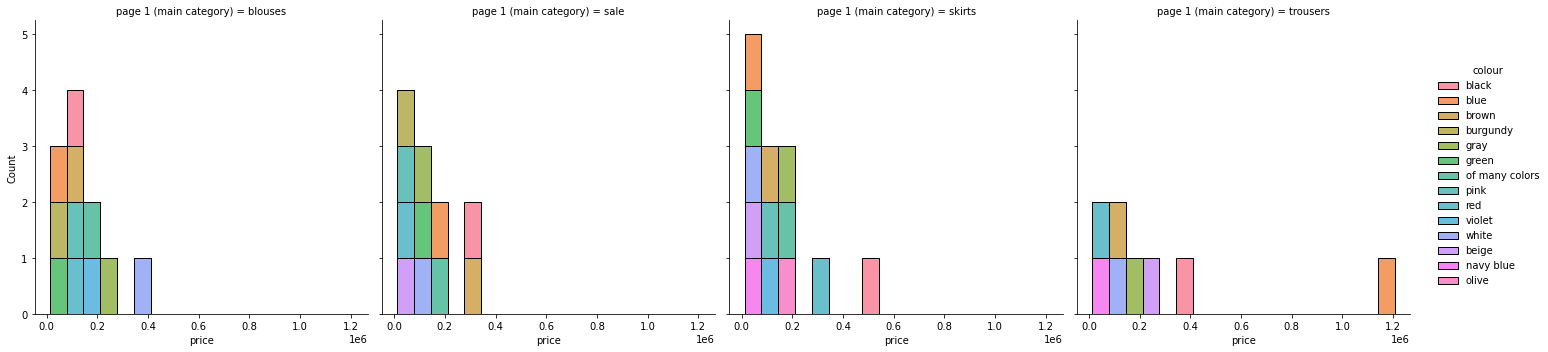

In [51]:
df_sum = eshop.groupby(['page 1 (main category)', 'colour'])[['price']].sum()
sns.displot(data=df_sum, x="price", hue="colour", col="page 1 (main category)", multiple="stack")


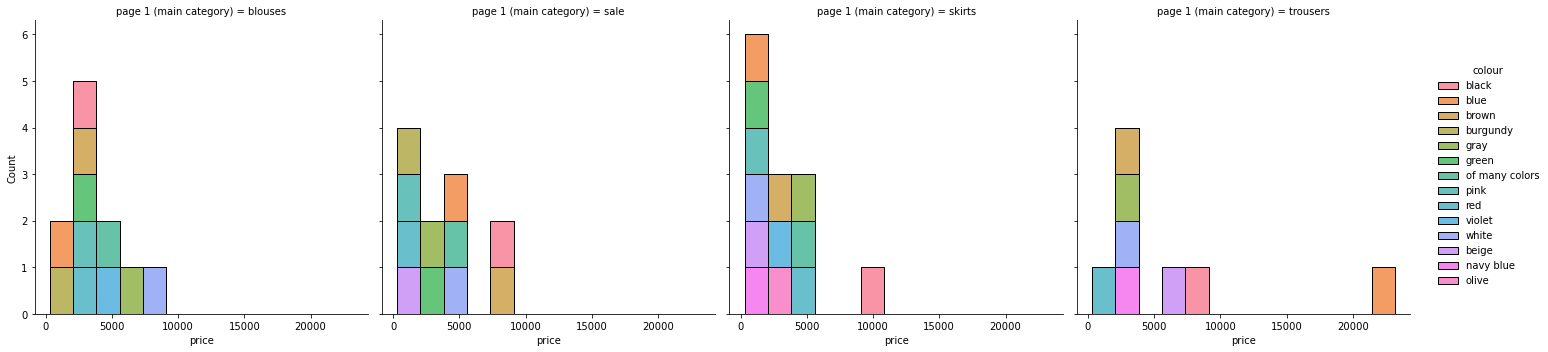

In [52]:
df_count = eshop.groupby(['page 1 (main category)', 'colour'])[['price']].count()
sns.displot(data=df_count, x="price", hue="colour", col="page 1 (main category)", multiple="stack")


#### Alternatively plot using Plotly

In [53]:
# Group the desired columns and sum the result 
df_sum = eshop.groupby(['page 1 (main category)', 'colour'])[['price']].sum().reset_index()

# Create plot using Plotly bar
fig = px.bar(df_sum, x="page 1 (main category)", y="price", color="colour", barmode="stack")
fig.show()


In [54]:
# Group the desired columns and count the result 
df_count = eshop.groupby(['page 1 (main category)', 'colour'])[['price']].count().reset_index()

# Create plot using Plotly bar
fig = px.bar(df_count, x="page 1 (main category)", y="price", color="colour", barmode="stack")
fig.show()

<b> Conclusion </b>
* Based on our previous analysis, we have identified that the most sold item on the website is Trousers and it has generated a revenue of over 2 million. Out of the total revenue, the Blue color Trousers alone have generated 1.2 million. In addition, Black color Skirts have also performed well and generated an overall value of 540k.

### Multivariate Analysis

In [55]:
eshop.head()

year  month  day  order country  session ID page 1 (main category)  \
0  2008  April    1      1  Poland           1               trousers   
1  2008  April    1      2  Poland           1               trousers   
2  2008  April    1      3  Poland           1                 skirts   
3  2008  April    1      4  Poland           1                 skirts   
4  2008  April    1      5  Poland           1                 skirts   

  page 2 (clothing model) colour              location model photography  \
0                     A13  beige  bottom in the middle           en face   
1                     A16  beige          bottom right           en face   
2                      B4  olive     top in the middle           en face   
3                     B17   gray          bottom right           profile   
4                      B8  brown             top right           profile   

   price price 2  page  
0     28      no     1  
1     33      no     1  
2     52     yes     1  
3     38      no     1  
4     52     yes     1

In [56]:
df.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

<Figure size 432x432 with 0 Axes>

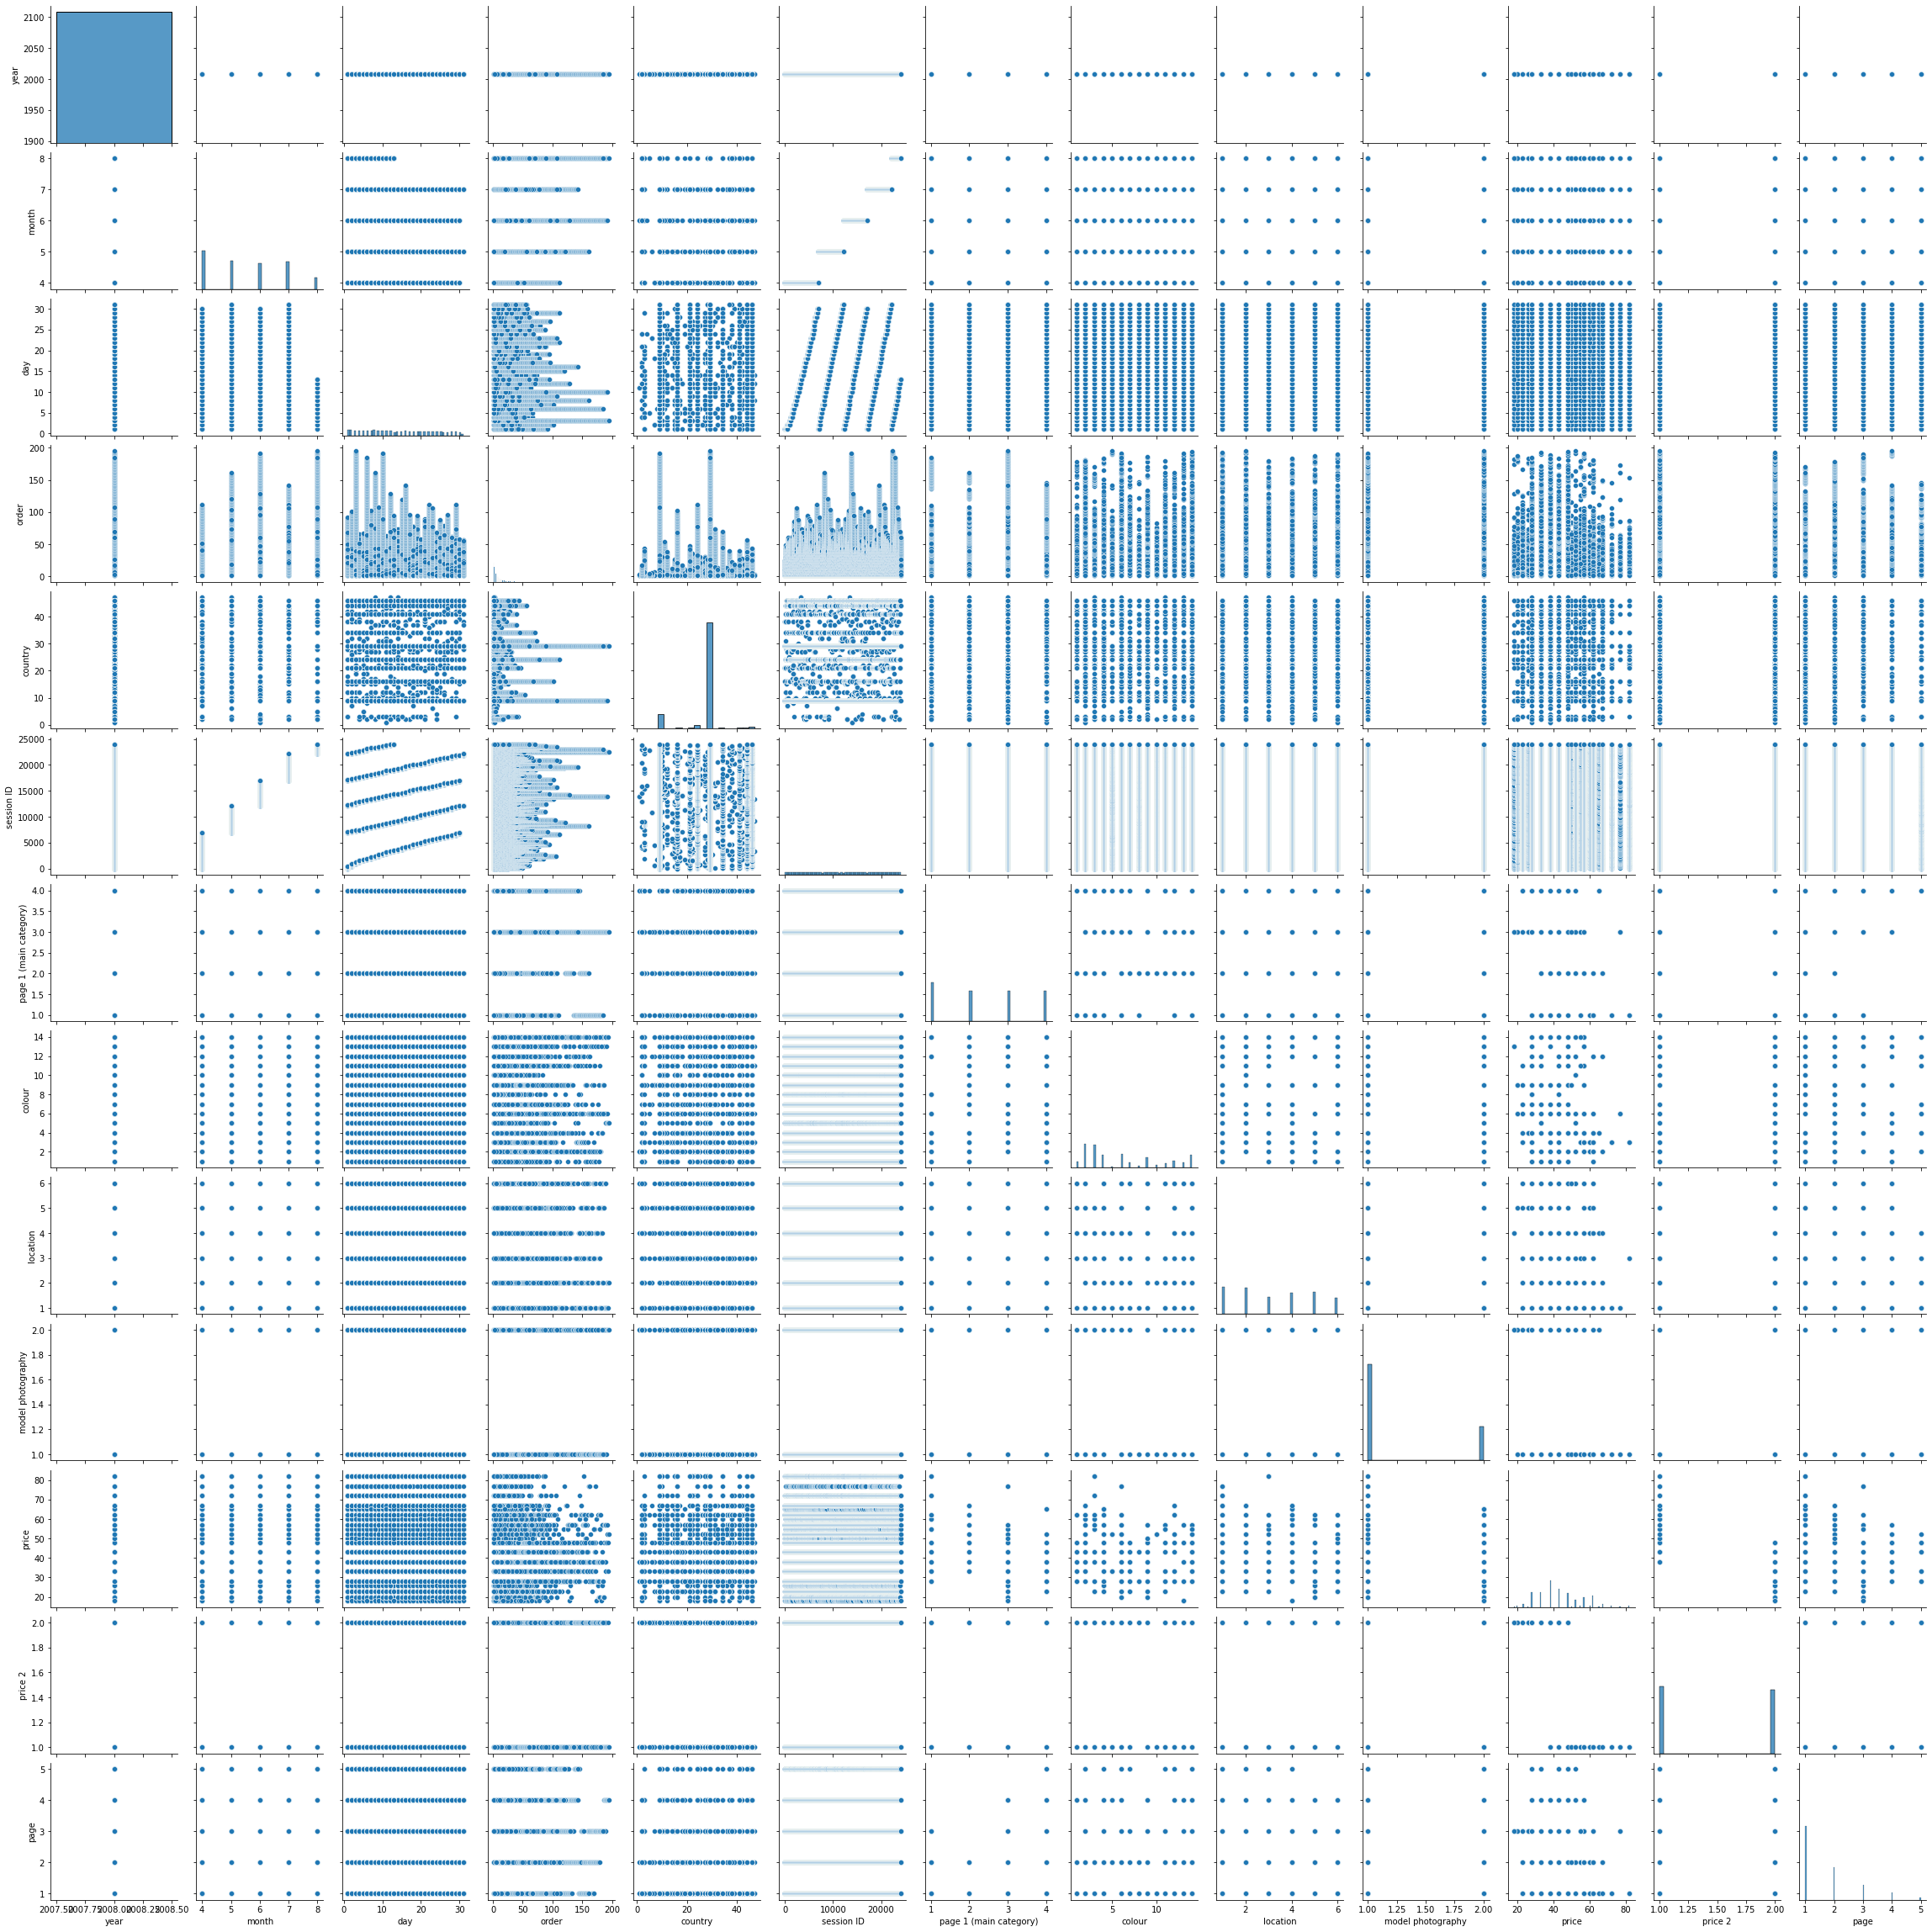

In [57]:
#Create pairplot to see the distribution of all the features

plt.figure(figsize=(6, 6))
sns.pairplot(df)

<b> Conclusion </b>
* Day and order seems to have highly correlated.
* Order and country have positive correlation.


###  Missing Value Analysis

* No missing value. The data seems pretty good. 

### Outlier Analysis

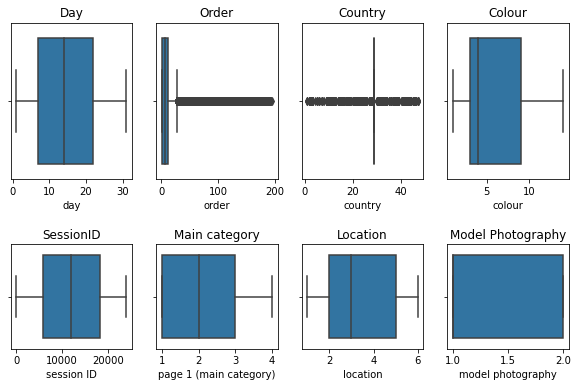

In [58]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 6), 
                        gridspec_kw={'height_ratios': [1.5, 1]})

# Create the subplot using a boxplot chart of day
sns.boxplot(x=df['day'], ax=axs[0, 0])
axs[0, 0].set_title('Day')

# Create the subplot using a boxplot chart of order
sns.boxplot(x=df['order'], ax=axs[0, 1])
axs[0, 1].set_title('Order')

# Create the subplot using a boxplot chart of country
sns.boxplot(x=df['country'], ax=axs[0, 2])
axs[0, 2].set_title('Country')

# Create the subplot using a boxplot chart of colour
sns.boxplot(x=df['colour'], ax=axs[0, 3])
axs[0, 3].set_title('Colour')

# Create the subplot using a boxplot chart of SesssionID
sns.boxplot(x=df['session ID'], ax=axs[1, 0])
axs[1, 0].set_title('SessionID')

# Create the subplot using a boxplot chart of page 1 category
sns.boxplot(x=df['page 1 (main category)'], ax=axs[1, 1])
axs[1, 1].set_title('Main category')

# Create the subplot using a boxplot chart of location
sns.boxplot(x=df['location'], ax=axs[1, 2])
axs[1, 2].set_title('Location')

# Create the subplot using a boxplot chart of model photography
sns.boxplot(x=df['model photography'], ax=axs[1, 3])
axs[1, 3].set_title('Model Photography')

# Create the subplot using a boxplot chart of price
#sns.boxplot(x=df['price'], ax=axs[2, 0])
#axs[2, 0].set_title('Price')

# Adjust the height ratios of the subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



<b> Conclusion </b>
* The data appears to have a relatively even distribution and there are no outliers present.

### <b> Future Enhancement for EDA Analysis </b>
* Eliminate the manual steps of doing Univariate analysis. The actions involved copying and updating the previous block to match the new feature. However, there must be a better way likely developing a function to plot the graph.
* Perform bivariate analysis using remaining features.   
* Perform multivariate analysis using PCA. 

## -----EDA Completed----- 

********************************
********************************

## ----- Data Preparation ----- 

In [59]:
df.describe()

year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                1.144420       4.235606       1.713206   
min         1.000000                1.000000       1.000000       1.000000   
25%      5931.000000                1.000000       3.000000       2.000000   
50%     11967.500000                2.000000       4.000000       3.000000   
75%     18219.000000                3.000000       9.000000       5.000000   
max     24026.000000                4.000000      14.000000       6.000000   

       model photography          price        price 2           page  
count      165474.000000  165474.000000  165474.000000  165474.000000  
mean            1.260071      43.802507       1.488167       1.710166  
std             0.438674      12.548131       0.499861       0.982412  
min             1.000000      18.000000       1.000000       1.000000  
25%             1.000000      33.000000       1.000000       1.000000  
50%             1.000000      43.000000       1.000000       1.000000  
75%             2.000000      52.000000       2.000000       2.000000  
max             2.000000      82.000000       2.000000       5.000000

Based on the data described above it seems Normalization could be a good option. As normalization scales the values in a dataset to a range of 0 to 1. It is useful when you want to compare variables that have different scales or ranges, as it ensures that all features are on a common scale.

In [214]:
# Encoding and Transformation 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [61]:
# Create copy of the data for the experimentation 
eshop_transform = df.copy()
eshop_transform.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

### Regression Model Evaluation 

In [62]:
#Remove year, session ID and target variable price
columns = ['month', 'day', 'order', 'country',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price 2', 'page']

##### Encode using LabelEncoder

In [98]:
# Encode the feature page 2 (clothing model) using LabelEncoder
label_encode = LabelEncoder()

#Create fit and transformed dataset
eshop_transform['page 2 (clothing model)'] = label_encode.fit_transform(eshop_transform['page 2 (clothing model)'])
eshop_transform.head()

year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        4       1         5                  1     28   
1                        7       1         6                  1     33   
2                       70      10         2                  1     52   
3                       51       6         6                  2     38   
4                       74       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     1

##### Normalize dataset using MixMaxScaler

In [99]:
#Create the pipeline using MinMixScaler
norm = MinMaxScaler()

#Fit and transform the data
eshop_normalize = norm.fit_transform(eshop_transform[columns])

In [100]:
# Create dataframe of the transformed dataset
eshop_normalize_df = pd.DataFrame(eshop_normalize, columns=columns)
eshop_normalize_df.head()

month  day     order   country  page 1 (main category)  \
0    0.0  0.0  0.000000  0.608696                0.000000   
1    0.0  0.0  0.005155  0.608696                0.000000   
2    0.0  0.0  0.010309  0.608696                0.333333   
3    0.0  0.0  0.015464  0.608696                0.333333   
4    0.0  0.0  0.020619  0.608696                0.333333   

   page 2 (clothing model)    colour  location  model photography  price 2  \
0                 0.018519  0.000000       0.8                0.0      1.0   
1                 0.032407  0.000000       1.0                0.0      1.0   
2                 0.324074  0.692308       0.2                0.0      0.0   
3                 0.236111  0.384615       1.0                1.0      1.0   
4                 0.342593  0.230769       0.4                1.0      0.0   

   page  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [117]:
# Split the data into dependent and target variables.

X_linear = eshop_normalize_df
y_linear = df['price']

In [118]:
# Split the data into train and test dataset
X_train_linear, X_test_linear,y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, 
                                                                               test_size=0.3, random_state=42)

## ----- Modeling ----- 

In [120]:
# Import Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor

In [121]:
%%time

# Define the baseline Score 
dummy_linear = DummyRegressor().fit(X_train_linear, y_train_linear)
baseline_score_linear = dummy_linear.score(X_test_linear, y_test_linear)

print('Baseline Score of Linear Regression: ', baseline_score_linear)

Baseline Score of Linear Regression:  -4.053847080243145e-05
CPU times: user 1.8 ms, sys: 1.54 ms, total: 3.34 ms
Wall time: 1.94 ms


#### Linear Regression

In [132]:
%%time

# Create object of Linear Regression
linear = LinearRegression()

# Create fit function on the linear regression
linear.fit(X_train_linear, y_train_linear)

linear_test_score = linear.score(X_test_linear, y_test_linear)
linear_train_score = linear.score(X_train_linear, y_train_linear)

print("Test Score: {:.2f}".format(linear_test_score))
print("Train Score: {:.2f}".format(linear_train_score))

Test Score: 0.79
Train Score: 0.79
CPU times: user 81.8 ms, sys: 4.43 ms, total: 86.2 ms
Wall time: 23.2 ms


In [127]:
# Import libraries for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
# Evaluate model 

# Predict on the test data
y_pred_linear = linear.predict(X_test_linear)

# Calculate Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
print("Mean Squared Error (MSE): {:.2f}".format(mse_linear))

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_linear))

# Calculate R-squared (R2) score
r2_linear = r2_score(y_test_linear, y_pred_linear)
print("R-squared (R2) Score: {:.2f}".format(r2_linear))

# Calculate Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)
print("Mean Absolute Error (MAE): {:.2f}".format(mae_linear))

Mean Squared Error (MSE): 33.55
Root Mean Squared Error (RMSE): 5.79
R-squared (R2) Score: 0.79
Mean Absolute Error (MAE): 4.38


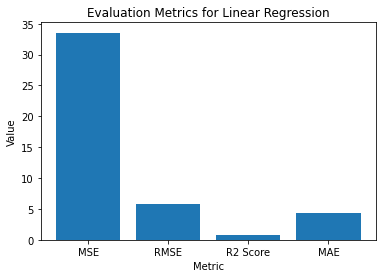

In [128]:
# Create a bar plot
metrics = ['MSE', 'RMSE', 'R2 Score', 'MAE']
values = [mse_linear, rmse_linear, r2_linear, mae_linear]
plt.bar(metrics, values)
plt.title('Evaluation Metrics for Linear Regression')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

<b>Conclusion</b>
* Mean Squared Error (MSE): The average squared difference between the predicted and actual values is 33.55. This value is sensitive to outliers, and a higher value indicates a worse fit. There wasn't outlier in the dataset so lowe value of MSE is reasonable. 

* Root Mean Squared Error (RMSE): The square root of the MSE is 5.79, which is a more interpretable measure of the model's performance. This means that the predicted values have an average deviation of approximately 5.79 units from the actual values.

* R-squared (R2) Score: This metric ranges from 0 to 1, where 1 indicates a perfect fit. The R2 score of 0.79 indicates that approximately 79% of the variability in the target variable can be explained by the linear regression model.

* Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is 4.38. This value is less sensitive to outliers compared to the MSE.

* Test Score and Train Score: These scores indicate the goodness of fit of the model on the training and test datasets, respectively. The values of 0.787 for both scores suggest that the model is performing relatively well on both the training and test datasets.

Overall, the model appears to be performing reasonably well, with a relatively low RMSE and MAE, and a high R2 score. 

#### Lasso Regression

In [131]:
%%time

# Create object of Linear Regression
lasso = Lasso()

# Create fit function on the linear regression
lasso.fit(X_train_linear, y_train_linear)

#Calculate test and train score
lasso_test_score = lasso.score(X_test_linear, y_test_linear)
lasso_train_score = lasso.score(X_train_linear, y_train_linear)

print("Test Score: {:.2f}".format(lasso_test_score))
print("Train Score: {:.2f}".format(lasso_train_score))

Test Score: 0.70
Train Score: 0.70
CPU times: user 95.3 ms, sys: 13.7 ms, total: 109 ms
Wall time: 39.1 ms


In [133]:
# Evaluate model 

# Predict on the test data
y_pred_lasso = lasso.predict(X_test_linear)

# Calculate Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test_linear, y_pred_lasso)
print("Mean Squared Error (MSE): {:.2f}".format(mse_lasso))

# Calculate Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_lasso))

# Calculate R-squared (R2) score
r2_lasso = r2_score(y_test_linear, y_pred_lasso)
print("R-squared (R2) Score: {:.2f}".format(r2_lasso))

# Calculate Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_test_linear, y_pred_lasso)
print("Mean Absolute Error (MAE): {:.2f}".format(mae_lasso))

Mean Squared Error (MSE): 47.90
Root Mean Squared Error (RMSE): 6.92
R-squared (R2) Score: 0.70
Mean Absolute Error (MAE): 5.17


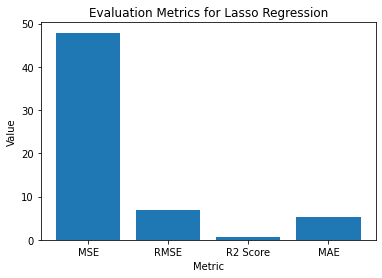

In [134]:
# Create a bar plot
metrics = ['MSE', 'RMSE', 'R2 Score', 'MAE']
values = [mse_lasso, rmse_lasso, r2_lasso, mae_lasso]
plt.bar(metrics, values)
plt.title('Evaluation Metrics for Lasso Regression')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

<b>Conclusion</b>
* Mean Squared Error (MSE): The average squared difference between the predicted and actual values is 47.90. This value is sensitive to outliers, and a higher value indicates a worse fit.

* Root Mean Squared Error (RMSE): The square root of the MSE is 6.92, which is a more interpretable measure of the model's performance. This means that the predicted values have an average deviation of approximately 6.92 units from the actual values.

* R-squared (R2) Score: This metric ranges from 0 to 1, where 1 indicates a perfect fit. The R2 score of 0.70 indicates that approximately 70% of the variability in the target variable can be explained by the Lasso regression model.

* Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is 5.17. This value is less sensitive to outliers compared to the MSE.

* Test Score and Train Score: These scores indicate the goodness of fit of the model on the training and test datasets, respectively. The values of 0.70 for both scores suggest that the model is performing relatively well on both the training and test datasets.

Compared to the linear regression model, the Lasso regression model has a higher MSE, RMSE, and MAE, and a lower R2 score, indicating that the model may not be as accurate in predicting the target variable. Additionally, the Lasso regression model may be more appropriate if there are many predictor variables, as it can help with feature selection by shrinking the coefficients of less important predictors to zero.

#### Ridge Regression

In [135]:
%%time

# Create object of Linear Regression
ridge = Ridge()

# Create fit function on the linear regression
ridge.fit(X_train_linear, y_train_linear)

#Calculate test and train score
ridge_test_score = ridge.score(X_test_linear, y_test_linear)
ridge_train_score = ridge.score(X_train_linear, y_train_linear)

print("Test Score: {:.2f}".format(ridge_test_score))
print("Train Score: {:.2f}".format(ridge_train_score))

Test Score: 0.79
Train Score: 0.79
CPU times: user 97.1 ms, sys: 6.54 ms, total: 104 ms
Wall time: 26.9 ms


In [138]:
# Evaluate model 

# Predict on the test data
y_pred_ridge = ridge.predict(X_test_linear)

# Calculate Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test_linear, y_pred_ridge)
print("Mean Squared Error (MSE): {:.2f}".format(mse_ridge))

# Calculate Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_lasso)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse_ridge))

# Calculate R-squared (R2) score
r2_ridge = r2_score(y_test_linear, y_pred_ridge)
print("R-squared (R2) Score: {:.2f}".format(r2_ridge))

# Calculate Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test_linear, y_pred_ridge)
print("Mean Absolute Error (MAE): {:.2f}".format(mae_ridge))

Mean Squared Error (MSE): 33.55
Root Mean Squared Error (RMSE): 6.92
R-squared (R2) Score: 0.79
Mean Absolute Error (MAE): 4.38


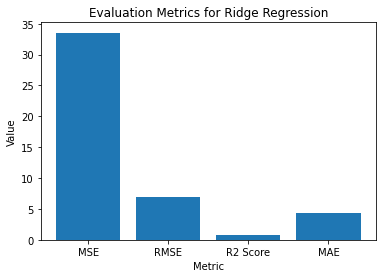

In [137]:
# Create a bar plot
metrics = ['MSE', 'RMSE', 'R2 Score', 'MAE']
values = [mse_ridge, rmse_ridge, r2_ridge, mae_ridge]
plt.bar(metrics, values)
plt.title('Evaluation Metrics for Ridge Regression')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

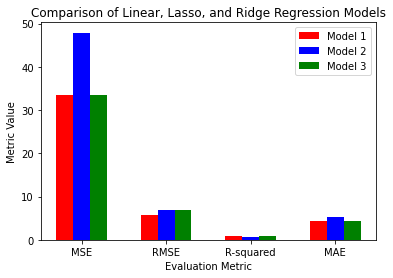

In [189]:
# Evaluation metrics for each model
linear_metrics = [33.55, 5.79, 0.79, 4.38]
lasso_metrics = [47.90, 6.92, 0.70, 5.17]
ridge_metrics = [33.55, 6.92, 0.79, 4.38]

# Define metric labels
metric_labels = ['MSE', 'RMSE', 'R-squared', 'MAE']

# Set x-axis locations for each model
xlocs = np.array([0, 1, 2, 3])

# Set bar widths and colors
width = 0.2
colors = ['red', 'blue', 'green']

# Plot bars for each metric
fig, ax = plt.subplots()
for i, metrics in enumerate([linear_metrics, lasso_metrics, ridge_metrics]):
    ax.bar(xlocs + i*width, metrics, width, label=f'Model {i+1}', color=colors[i])

# Set axis labels and title
ax.set_xticks(xlocs + width)
ax.set_xticklabels(metric_labels)
ax.set_xlabel('Evaluation Metric')
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Linear, Lasso, and Ridge Regression Models')

# Add legend
ax.legend()

# Display plot
plt.show()



<b>Conclusion</b>
* Mean Squared Error (MSE): The average squared difference between the predicted and actual values is 33.55. This value is sensitive to outliers, and a higher value indicates a worse fit.

* Root Mean Squared Error (RMSE): The square root of the MSE is 6.92, which is a more interpretable measure of the model's performance. This means that the predicted values have an average deviation of approximately 6.92 units from the actual values.

* R-squared (R2) Score: This metric ranges from 0 to 1, where 1 indicates a perfect fit. The R2 score of 0.79 indicates that approximately 79% of the variability in the target variable can be explained by the Ridge regression model.

* Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values is 4.38. This value is less sensitive to outliers compared to the MSE.

* Test Score and Train Score: These scores indicate the goodness of fit of the model on the training and test datasets, respectively. The values of 0.79 for both scores suggest that the model is performing relatively well on both the training and test datasets.

Compared to the Lasso regression model, the Ridge regression model has a lower MSE, RMSE, and MAE, and a higher R2 score, indicating that the model may be more accurate in predicting the target variable. Additionally, the Ridge regression model may be more appropriate if there are many predictor variables that are all important to the model, as it can help with regularization by shrinking the coefficients of all predictors, but not to zero like the Lasso regression.

## Building the classification model

#### Assumption 
<b><i>The assumption for building the classification model is to categorize the prices of items as either higher or lower, utilizing the provided dataset.</b></i>

#### Question to answer

<b><i>Can the "Price 2" columns be used to perform classification tasks, such as predicting whether a product is affordable or expensive?</b></i>

<b><i> Classification model to consider - Logistic Regression, KNN, and SVC </b></i>

In [144]:

eshop_transform.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [164]:
# Remove year and SesssionId and target variable Price 2
column_clas = ['month', 'day', 'order', 'country',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'page']

In [161]:
#Create the pipeline using MinMixScaler
norm = MinMaxScaler()

#Fit and transform the data
eshop_normalize_clas = norm.fit_transform(eshop_transform[column_clas])

In [165]:
# Create dataframe of the transformed dataset
eshop_normalize_clas_df = pd.DataFrame(eshop_normalize_clas, columns=column_clas)
eshop_normalize_clas_df.head()

month  day     order   country  page 1 (main category)  \
0    0.0  0.0  0.000000  0.608696                0.000000   
1    0.0  0.0  0.005155  0.608696                0.000000   
2    0.0  0.0  0.010309  0.608696                0.333333   
3    0.0  0.0  0.015464  0.608696                0.333333   
4    0.0  0.0  0.020619  0.608696                0.333333   

   page 2 (clothing model)    colour  location  model photography  price  page  
0                 0.018519  0.000000       0.8                0.0    1.0   0.0  
1                 0.032407  0.000000       1.0                0.0    1.0   0.0  
2                 0.324074  0.692308       0.2                0.0    0.0   0.0  
3                 0.236111  0.384615       1.0                1.0    1.0   0.0  
4                 0.342593  0.230769       0.4                1.0    0.0   0.0

In [166]:
# Split the data into dependent and target variables.
X_clas = eshop_normalize_clas_df
y_clas = eshop_normalize_clas_df["price"]

In [169]:
# Split the data into train and test dataset
X_train_clas, X_test_clas,y_train_clas, y_test_clas = train_test_split(X_clas, y_clas, 
                                                                               test_size=0.3, random_state=42)

##### Standarize dataset using StandardScaler

In [216]:
#Create the pipeline using Standardscaler
std = StandardScaler()

#Fit and transform the data
eshop_std = std.fit_transform(eshop_transform[column_clas])

In [217]:
# Create dataframe of the standard dataset
eshop_std_clas_df = pd.DataFrame(eshop_std, columns=column_clas)
eshop_std_clas_df.head()

month       day     order  country  page 1 (main category)  \
0 -1.194051 -1.531599 -0.654194  0.28632               -1.224067   
1 -1.194051 -1.531599 -0.580002  0.28632               -1.224067   
2 -1.194051 -1.531599 -0.505809  0.28632               -0.350259   
3 -1.194051 -1.531599 -0.431616  0.28632               -0.350259   
4 -1.194051 -1.531599 -0.357423  0.28632               -0.350259   

   page 2 (clothing model)    colour  location  model photography     price  \
0                -1.332005 -1.234220  1.016695          -0.592858 -1.259355   
1                -1.281258 -1.234220  1.600398          -0.592858 -0.860888   
2                -0.215558  0.890630 -0.734414          -0.592858  0.653286   
3                -0.536960 -0.053748  1.600398           1.686743 -0.462421   
4                -0.147895 -0.525937 -0.150711           1.686743  0.653286   

       page  
0 -0.722882  
1 -0.722882  
2 -0.722882  
3 -0.722882  
4 -0.722882

In [220]:
# Split the data into dependent and target variables.
X_clas_std = eshop_std_clas_df
y_clas_std = eshop_transform["price 2"]

In [221]:
# Split the data into train and test dataset
X_train_clas_std, X_test_clas_std,y_train_clas_std, y_test_clas_std = train_test_split(X_clas_std, y_clas_std, 
                                                                               test_size=0.3, random_state=42)

In [170]:
# Create a copy of the data 
#eshop_classification = eshop.copy()
#eshop_classification.head()

In [171]:
# Delete two columns as they don't seem to be useful
#eshop_classification.drop(columns=['page 2 (clothing model)', 'year'], inplace=True)
#eshop_classification.head()

In [67]:
# Split the data into dependent and target variables.

#X = eshop_classification.drop(columns='price 2', axis=1)
#y = eshop_classification['price 2']

In [68]:
# Split the data into train and test dataset
#X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
# Define the baseline Score 

dummy_clf = DummyClassifier().fit(X_train_clas, y_train_clas)
baseline_score = dummy_clf.score(X_test_clas, y_test_clas)

print("Baseline Score of Classification model: {:.2f}".format(baseline_score))

Baseline Score of Classification model: 0.51


#### Without Transformation

In [198]:
# Create dataframe of the transformed dataset
eshop_clas_df = pd.DataFrame(eshop_transform, columns=column_clas)
eshop_clas_df.head()

month  day  order  country  page 1 (main category)  \
0      4    1      1       29                       1   
1      4    1      2       29                       1   
2      4    1      3       29                       2   
3      4    1      4       29                       2   
4      4    1      5       29                       2   

   page 2 (clothing model)  colour  location  model photography  price  page  
0                        4       1         5                  1     28     1  
1                        7       1         6                  1     33     1  
2                       70      10         2                  1     52     1  
3                       51       6         6                  2     38     1  
4                       74       4         3                  2     52     1

In [200]:
# Split the data into dependent and target variables.
X_clas_1 = eshop_clas_df
y_clas_1 = eshop_transform["price 2"]

In [201]:
# Split the data into train and test dataset
X_train_clas_1, X_test_clas_1,y_train_clas_1, y_test_clas_1 = train_test_split(X_clas_1, y_clas_1, 
                                                                               test_size=0.3, random_state=42)

### SVC

In [173]:
#eshop_classification_sample_svc = eshop_classification.sample(n=30000, random_state=42)

#eshop_classification_sample_svc.info()

In [71]:
#X_s = eshop_classification.drop(columns='price 2', axis=1)
#y_s = eshop_classification['price 2']

In [174]:
#X_train_s, X_test_s,y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [259]:
# Define the parameters of SVC Regression to use in Grid Search
params = {'kernel': ['rbf', 'poly', 'linear', 'linearSVC'],
         'gamma': [0.01, 0.1, 0.2, 0.02],
         'C': [0.01, 0.1, 0.2, 0.02]}

In [ ]:
%%time

svc = SVC()
#svc_defaults = svc.score(X_test, y_test)

#build grid search
grid_svc = GridSearchCV(svc, param_grid=params, cv=5, n_jobs=-1).fit(X_train_clas, y_train_clas)
grid_score_svc_test = grid_svc.score(X_test_clas, y_test_clas)
grid_score_svc_train = grid_svc.score(X_train_clas, y_train_clas)
best_params_svc = grid_svc.best_params_

#print('Test Score: ',grid_score_svc_test)
#print('Train Score: ',grid_score_svc_train)

print("SVC Test Score: {:.2f}".format(grid_score_svc_test))
print("SVC Train Score: {:.2f}".format(grid_score_svc_train))
print("Best parameters:", best_params_svc)


### Logistic Regression

In [184]:
# Define the parameters of Logistic Regression to use in Grid Search
params_lr = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [208]:
%%time

# Create Logistic Regression object
lr = LogisticRegression(max_iter=1000)
#lr_defaults = lr.score(X_test, y_test)

#build grid search
grid_lr = GridSearchCV(lr, param_grid=params_lr, cv=5, n_jobs=-1).fit(X_train_clas, y_train_clas)
grid_score_lr_test = grid_lr.score(X_test_clas, y_test_clas)
grid_score_lr_train = grid_lr.score(X_train_clas, y_train_clas)
best_params_lr = grid_lr.best_params_

#print('Test Score: ',grid_score_lr_test)
#print('Train Score: ',grid_score_lr_train)

print("SVC Test Score: {:.2f}".format(grid_score_lr_test))
print("SVC Train Score: {:.2f}".format(grid_score_lr_train))
print("Best parameters:", best_params_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.]



SVC Test Score: 1.00
SVC Train Score: 1.00
Best parameters: {'C': 0.001, 'penalty': 'l2'}
CPU times: user 1.06 s, sys: 318 ms, total: 1.38 s
Wall time: 1.95 s


##### Without Transformation

In [202]:
%%time

# Create Logistic Regression object
#lr = LogisticRegression(max_iter=1000)
#lr_defaults = lr.score(X_test, y_test)

#build grid search
grid_lr_1 = GridSearchCV(lr, param_grid=params_lr, cv=5, n_jobs=-1).fit(X_train_clas_1, y_train_clas_1)
grid_score_lr_test_1 = grid_lr_1.score(X_test_clas_1, y_test_clas_1)
grid_score_lr_train_1 = grid_lr_1.score(X_train_clas_1, y_train_clas_1)
best_params_lr_1 = grid_lr_1.best_params_

#print('Test Score: ',grid_score_lr_test)
#print('Train Score: ',grid_score_lr_train)

print("SVC Test Score: {:.2f}".format(grid_score_lr_test_1))
print("SVC Train Score: {:.2f}".format(grid_score_lr_train_1))
print("Best parameters:", best_params_lr_1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan 0.98921705        nan 0.99303295        nan 0.99822155
        nan 0.99824745        nan 0.99824745        nan 0.99824745]



SVC Test Score: 1.00
SVC Train Score: 1.00
Best parameters: {'C': 1, 'penalty': 'l2'}
CPU times: user 19.7 s, sys: 877 ms, total: 20.6 s
Wall time: 40.8 s


##### Standarization

In [225]:
%%time

# Create Logistic Regression object
#lr = LogisticRegression(max_iter=1000)
#lr_defaults = lr.score(X_test, y_test)

#build grid search
grid_lr_std = GridSearchCV(lr, param_grid=params_lr, cv=5, n_jobs=-1).fit(X_train_clas_std, y_train_clas_std)
grid_score_lr_test_std = grid_lr_std.score(X_test_clas_std, y_test_clas_std)
grid_score_lr_train_std = grid_lr_std.score(X_train_clas_std, y_train_clas_std)
best_params_lr_std = grid_lr_std.best_params_

#print('Test Score: ',grid_score_lr_test)
#print('Train Score: ',grid_score_lr_train)

print("SVC Test Score: {:.2f}".format(grid_score_lr_test_std))
print("SVC Train Score: {:.2f}".format(grid_score_lr_train_std))
print("Best parameters:", best_params_lr_std)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan 0.98939834        nan 0.9916689         nan 0.99305885
        nan 0.99824745        nan 0.99824745        nan 0.99824745]



SVC Test Score: 1.00
SVC Train Score: 1.00
Best parameters: {'C': 1, 'penalty': 'l2'}
CPU times: user 1.51 s, sys: 489 ms, total: 2 s
Wall time: 5.94 s


In [ ]:
X = df.drop('price 2', axis=1)
y = df["price 2"]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

##### Compare metrics

In [266]:
from sklearn.metrics import precision_score, recall_score, f1_score

# make predictions on the test data
y_pred = grid_lr.predict(X_test_clas)

# calculate precision, recall, and F1-score
precision = precision_score(y_test_clas, y_pred)
recall = recall_score(y_test_clas, y_pred)
f1 = f1_score(y_test_clas, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


### KNN

In [180]:
# Define the parameters of KNN to use in Grid Search
params_knn = {'n_neighbors': [5, 10, 15],
         'weights': ['uniform', 'distance'],}

In [211]:
%%time

# Create KNN object
knn = KNeighborsClassifier()
#knn_defaults = knn.score(X_test, y_test)

#build grid search
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5, n_jobs=-1).fit(X_train_clas, y_train_clas)
grid_score_knn_test = grid_knn.score(X_test_clas, y_test_clas)
grid_score_knn_train = grid_knn.score(X_train_clas, y_train_clas)

#print('Test Score: ',grid_score_knn_test)
#print('Train Score: ',grid_score_knn_train)

print("SVC Test Score: {:.2f}".format(grid_score_knn_test))
print("SVC Train Score: {:.2f}".format(grid_score_knn_train))

SVC Test Score: 1.00
SVC Train Score: 1.00
CPU times: user 13.8 s, sys: 210 ms, total: 14 s
Wall time: 34.6 s


##### Without Transformation

In [210]:
%%time

# Create KNN object
#knn = KNeighborsClassifier()
#knn_defaults = knn.score(X_test, y_test)

#build grid search
grid_knn_1 = GridSearchCV(knn, param_grid=params_knn, cv=5, n_jobs=-1).fit(X_train_clas_1, y_train_clas_1)
grid_score_knn_test_1 = grid_knn_1.score(X_test_clas, y_test_clas)
grid_score_knn_train_1 = grid_knn_1.score(X_train_clas, y_train_clas)

#print('Test Score: ',grid_score_knn_test)
#print('Train Score: ',grid_score_knn_train)

print("SVC Test Score: {:.2f}".format(grid_score_knn_test_1))
print("SVC Train Score: {:.2f}".format(grid_score_knn_train_1))

SVC Test Score: 0.00
SVC Train Score: 0.00
CPU times: user 3.4 s, sys: 200 ms, total: 3.6 s
Wall time: 14.9 s


<b>Conclusion</b>

The objective of this method was to determine the importance of LabelEncoding/transformation of columns in a classification model. Although building models with Normalization and Standardization of the dataset without transformation (Label Encoding) was not very effective, as the resulting model metrics were not reasonable. The test and train scores of the models were both 1, indicating that the model was overfitting and not a reliable representation of the data.

### Classification Model with LabelEncoding all the columns and scaling price 2/target variable

In [226]:
clas_columns = ['month', 'day', 'order', 'country',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'page']

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

Transformation of dataset
* Standardization scales the data to have a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean of the feature and dividing it by the standard deviation of the feature.
* Normalization scales the data to be in the range of 0,1. This is done by subtracting the minimum value of the feature and dividing by the range of the feature.
* Some models, like K-nearest neighbor and Logistic regression models, are sensitive to the scale of the features and can lead to inaccurate prediction if features are on a different scale, , so normalization may be beneficial
* Algorithms such as logistic regression assume that the features are on a similar scale, so standardization may be more appropriate.

In [ ]:
# Create the first pipeline using the StandardScaler
preprocessor_pipeline_std = ColumnTransformer( transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', LabelEncoder(), categorical_features)
    ])

preprocessor_pipeline_std

In [305]:
#Create another copy of the dataset
df1 = eshop.copy()

In [232]:
df1.drop('session ID', axis=1, inplace=True)

In [233]:
df1.head()

year  month  day  order country page 1 (main category)  \
0  2008  April    1      1  Poland               trousers   
1  2008  April    1      2  Poland               trousers   
2  2008  April    1      3  Poland                 skirts   
3  2008  April    1      4  Poland                 skirts   
4  2008  April    1      5  Poland                 skirts   

  page 2 (clothing model) colour              location model photography  \
0                     A13  beige  bottom in the middle           en face   
1                     A16  beige          bottom right           en face   
2                      B4  olive     top in the middle           en face   
3                     B17   gray          bottom right           profile   
4                      B8  brown             top right           profile   

   price price 2  page  
0     28      no     1  
1     33      no     1  
2     52     yes     1  
3     38      no     1  
4     52     yes     1

In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  object
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  object
 5   page 1 (main category)   165474 non-null  object
 6   page 2 (clothing model)  165474 non-null  object
 7   colour                   165474 non-null  object
 8   location                 165474 non-null  object
 9   model photography        165474 non-null  object
 10  price                    165474 non-null  int64 
 11  price 2                  165474 non-null  object
 12  page                     165474 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 16.4+ MB


In [235]:
encoders = {}
for col in df1.columns:
    if df1[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df1[col] = label_encoder.fit_transform(df1[col])
            encoders[col] = label_encoder

In [239]:
df1["price 2"] = df1["price 2"] - 1

In [240]:
df1.head()

year  month  day  order  country  page 1 (main category)  \
0  2008      0    1      1       27                       3   
1  2008      0    1      2       27                       3   
2  2008      0    1      3       27                       2   
3  2008      0    1      4       27                       2   
4  2008      0    1      5       27                       2   

   page 2 (clothing model)  colour  location  model photography  price  \
0                        4       0         0                  0     28   
1                        7       0         2                  0     33   
2                       70       9         3                  0     52   
3                       51       5         2                  1     38   
4                       74       3         5                  1     52   

   price 2  page  
0       -1     1  
1       -1     1  
2        0     1  
3       -1     1  
4        0     1

In [242]:
X_2 = df1.drop('price 2', axis=1)
y_2 = df1["price 2"]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size=0.20, random_state = 0)

In [250]:
X_2.head()

year  month  day  order  country  page 1 (main category)  \
0  2008      0    1      1       27                       3   
1  2008      0    1      2       27                       3   
2  2008      0    1      3       27                       2   
3  2008      0    1      4       27                       2   
4  2008      0    1      5       27                       2   

   page 2 (clothing model)  colour  location  model photography  price  page  
0                        4       0         0                  0     28     1  
1                        7       0         2                  0     33     1  
2                       70       9         3                  0     52     1  
3                       51       5         2                  1     38     1  
4                       74       3         5                  1     52     1

In [243]:
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

#### Logistic Regression

In [295]:
%%time

# Create Logistic Regression object
#lr = LogisticRegression(max_iter=1000)
#lr_defaults = lr.score(X_test, y_test)

#build grid search
grid_lr_2 = GridSearchCV(lr, param_grid=params_lr, cv=5, n_jobs=-1).fit(x_train_2, y_train_2)
grid_score_lr_test_2 = grid_lr_2.score(x_test_2, y_test_2)
grid_score_lr_train_2 = grid_lr_2.score(x_train_2, y_train_2)
best_params_lr_2 = grid_lr_2.best_params_

#print('Test Score: ',grid_score_lr_test)
#print('Train Score: ',grid_score_lr_train)

print("Logistic Regression Test Score: {:.2f}".format(grid_score_lr_test_2))
print("Logistic Regression Train Score: {:.2f}".format(grid_score_lr_train_2))
print("Logistic Regression Best parameters:", best_params_lr_2)

Logistic Regression Test Score: 0.99
Logistic Regression Train Score: 0.99
Logistic Regression Best parameters: {'C': 0.01, 'penalty': 'l2'}
CPU times: user 457 ms, sys: 196 ms, total: 653 ms
Wall time: 4.72 s


In [277]:
# make predictions on the test data
y_pred_lr = grid_lr_2.predict(x_test_2)

# calculate precision, recall, and F1-score
precision_1 = precision_score(y_test_2, y_pred_lr, pos_label=0)
recall_1 = recall_score(y_test_2, y_pred_lr, pos_label=0)
f1_1 = f1_score(y_test_2, y_pred_lr, pos_label=0)

print("Logistic Regression Precision: {:.2f}".format(precision_1))
print("Logistic Regression Recall: {:.2f}".format(recall_1))
print("Logistic Regression F1-score: {:.2f}".format(f1_1))

Logistic Regression Precision: 0.98
Logistic Regression Recall: 1.00
Logistic Regression F1-score: 0.99


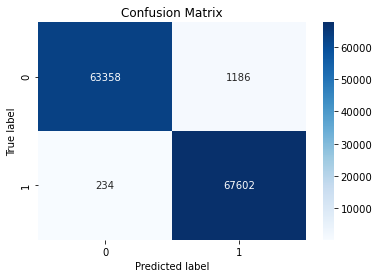

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99     64544
           0       0.98      1.00      0.99     67836

    accuracy                           0.99    132380
   macro avg       0.99      0.99      0.99    132380
weighted avg       0.99      0.99      0.99    132380

Logistic Regression Test Score:0.99
Logistic Regression Train Score:0.99


In [278]:
from sklearn.metrics import confusion_matrix, classification_report

# create a confusion matrix
cm = confusion_matrix(y_test_2, y_pred_lr)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# create a classification report
cr = classification_report(y_test_2, y_pred_lr)

# print the classification report
print(cr)

# print the accuracy scores
print("Logistic Regression Test Score:{:.2f}".format(grid_lr_2.score(x_test_2, y_test_2)))
print("Logistic Regression Train Score:{:.2f}".format(grid_lr_2.score(x_train_2, y_train_2)))


<b>Conclusion</b>
For the logistic regression model, we can interpret the following from the given metrics:

* Precision: The precision of the model is 0.98, which means that out of all the positive predictions made by the model, 98% of them were actually correct.

* Recall: The recall of the model is 0.996, which means that out of all the actual positive instances in the test data, the model was able to correctly identify 99.6% of them.

* F1-score: The F1-score of the model is 0.99, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.

* Logistic Regression Test Score: The LR test score is 0.99, which means that the model correctly predicted the class label for 99% of the test data.

* Logistic Regression Train Score: The LR train score is also 0.99, which means that the model was able to fit the training data well.

Best parameters: The best parameters for the logistic regression model are C=0.01 and penalty='l2'. This suggests that the L2 penalty was used for regularization with a relatively low value of C. This means that the model was regularized to avoid overfitting and the value of C was chosen to balance the regularization and the accuracy of the model.

#### KNN 

In [287]:
%%time

# Create KNN object
#knn = KNeighborsClassifier()
#knn_defaults = knn.score(X_test, y_test)

#build grid search
grid_knn_2 = GridSearchCV(knn, param_grid=params_knn, cv=5, n_jobs=-1).fit(x_train_2, y_train_2)
grid_score_knn_test_2 = grid_knn_2.score(x_test_2, y_test_2)
grid_score_knn_train_2 = grid_knn_2.score(x_train_2, y_train_2)
best_params_knn_2 = grid_knn_2.best_params_

#print('Test Score: ',grid_score_knn_test)
#print('Train Score: ',grid_score_knn_train)

print("KNN Test Score: {:.2f}".format(grid_score_knn_test_2))
print("KNN Train Score: {:.2f}".format(grid_score_knn_train_2))
print("KNN Best parameters:", best_params_knn_2)

KNN Test Score: 0.99
KNN Train Score: 1.00
KNN Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
CPU times: user 9.42 s, sys: 181 ms, total: 9.6 s
Wall time: 21.7 s


In [288]:
# make predictions on the test data
y_pred_knn = grid_knn_2.predict(x_test_2)

# calculate precision, recall, and F1-score
precision_knn = precision_score(y_test_2, y_pred_knn, pos_label=0)
recall_knn = recall_score(y_test_2, y_pred_knn, pos_label=0)
f1_knn = f1_score(y_test_2, y_pred_knn, pos_label=0)

print("KNN Precision: {:.2f}".format(precision_knn))
print("KNN Recall: {:.2f}".format(recall_knn))
print("KNN F1-score: {:.2f}".format(f1_knn))

KNN Precision: 0.99
KNN Recall: 1.00
KNN F1-score: 1.00


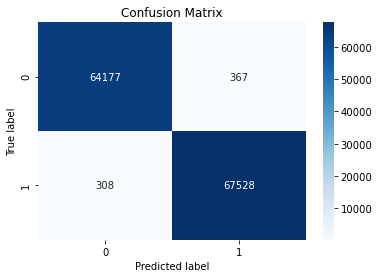

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99     64544
           0       0.99      1.00      1.00     67836

    accuracy                           0.99    132380
   macro avg       0.99      0.99      0.99    132380
weighted avg       0.99      0.99      0.99    132380

KNN Test Score:0.99
KNN Train Score:1.00


In [289]:
# create a confusion matrix
cm = confusion_matrix(y_test_2, y_pred_knn)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# create a classification report
cr = classification_report(y_test_2, y_pred_knn)

# print the classification report
print(cr)

# print the accuracy scores
print("KNN Test Score:{:.2f}".format(grid_knn_2.score(x_test_2, y_test_2)))
print("KNN Train Score:{:.2f}".format(grid_knn_2.score(x_train_2, y_train_2)))


<b>Conclusion</b>
* For the KNN classification model, the precision, recall, and F1-score are all very high, which indicates that the model is performing well in predicting both positive and negative classes. Specifically:

* Precision: The precision of 0.99 indicates that out of all the instances that the model predicted as positive (0), 99% of them were actually positive.

* Recall: The recall of 1.0 indicates that out of all the instances that were actually positive (0), 100% were correctly identified as positive by the model.

* F1-score: The F1-score of 1.0 is the harmonic mean of the precision and recall scores, and provides an overall measure of the model's accuracy.

* The high test and train scores of 0.99 and 1.0 respectively also indicate that the model is performing well and is not overfitting to the training data.

* The best parameters of {'n_neighbors': 5, 'weights': 'distance'} suggest that the model is using 5 nearest neighbors and using the inverse distance weighting for the predictions.

Overall, these metrics suggest that the KNN model is a good fit for the data and is accurately predicting the target variable. However, it's worth noting that the KNN model is sensitive to the choice of hyperparameters and can be computationally expensive for large datasets.

#### SVC

In [290]:
%%time

#svc = SVC()
#svc_defaults = svc.score(X_test, y_test)

#build grid search
grid_svc_2 = GridSearchCV(svc, param_grid=params, cv=5, n_jobs=-1).fit(x_train_2, y_train_2)
grid_score_svc_test_2 = grid_svc_2.score(x_test_2, y_test_2)
grid_score_svc_train_2 = grid_svc_2.score(x_train_2, y_train_2)
best_params_svc_2 = grid_svc_2.best_params_

#print('Test Score: ',grid_score_svc_test)
#print('Train Score: ',grid_score_svc_train)

print("SVC Test Score: {:.2f}".format(grid_score_svc_test_2))
print("SVC Train Score: {:.2f}".format(grid_score_svc_train_2))
print("Best parameters:", best_params_svc_2)

SVC Test Score: 1.00
SVC Train Score: 1.00
Best parameters: {'C': 0.2, 'gamma': 0.2, 'kernel': 'poly'}
CPU times: user 6.23 s, sys: 314 ms, total: 6.55 s
Wall time: 11min 51s


In [291]:
# make predictions on the test data
y_pred_svc = grid_svc_2.predict(x_test_2)

# calculate precision, recall, and F1-score
precision_svc = precision_score(y_test_2, y_pred_svc, pos_label=0)
recall_svc = recall_score(y_test_2, y_pred_svc, pos_label=0)
f1_svc = f1_score(y_test_2, y_pred_svc, pos_label=0)

print("SVC Precision: {:.2f}".format(precision_svc))
print("SVC Recall: {:.2f}".format(recall_svc))
print("SVC F1-score: {:.2f}".format(f1_svc))

SVC Precision: 1.00
SVC Recall: 1.00
SVC F1-score: 1.00


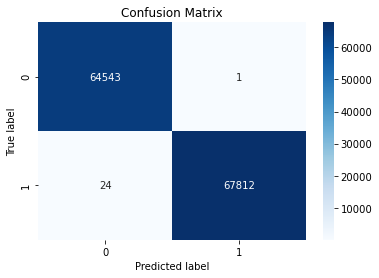

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     64544
           0       1.00      1.00      1.00     67836

    accuracy                           1.00    132380
   macro avg       1.00      1.00      1.00    132380
weighted avg       1.00      1.00      1.00    132380

SVC Test Score:1.00
SVC Train Score:1.00


In [292]:
# create a confusion matrix
cm = confusion_matrix(y_test_2, y_pred_svc)

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# create a classification report
cr = classification_report(y_test_2, y_pred_svc)

# print the classification report
print(cr)

# print the accuracy scores
print("SVC Test Score:{:.2f}".format(grid_svc_2.score(x_test_2, y_test_2)))
print("SVC Train Score:{:.2f}".format(grid_svc_2.score(x_train_2, y_train_2)))

<b>Conclusion</b>
* The SVC Test Score and Train Score are both 1.00 which means that the model is able to perfectly predict the class labels on both the training and test sets.

* The best parameters for the model are {'C': 0.2, 'gamma': 0.2, 'kernel': 'poly'}, which suggests that the optimal values for the regularization parameter (C) and the kernel coefficient (gamma) were found during the hyperparameter tuning process.

* The SVC Precision, Recall and F1-score are all 1.00, which means that the model is achieving perfect precision, recall and F1-score on both the training and test sets. Precision is the proportion of true positive predictions among all positive predictions. Recall is the proportion of true positive predictions among all actual positive cases. F1-score is a harmonic mean of precision and recall, which provides an overall measure of the model's performance.

* In conclusion, the SVC model is performing extremely well and is likely overfitting the data

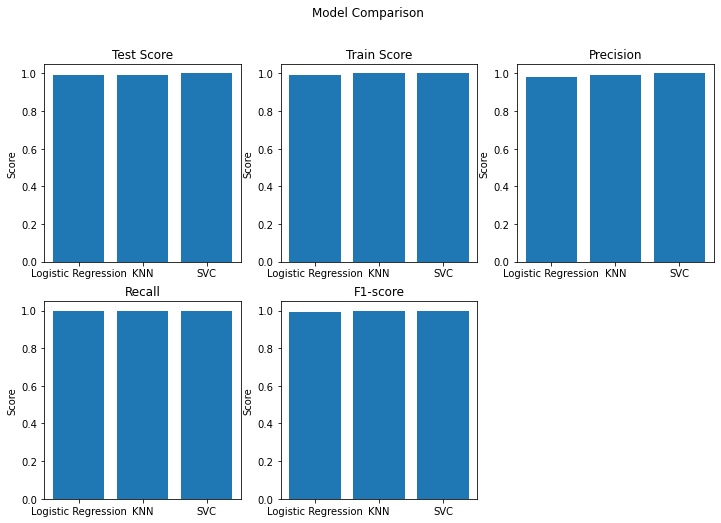

In [294]:
# Metrics for each model
lr_test_score = 0.99
lr_train_score = 0.99
lr_precision = 0.98
lr_recall = 1.00
lr_f1_score = 0.99

knn_test_score = 0.99
knn_train_score = 1.00
knn_precision = 0.99
knn_recall = 1.00
knn_f1_score = 1.00

svc_test_score = 1.00
svc_train_score = 1.00
svc_precision = 1.00
svc_recall = 1.00
svc_f1_score = 1.00

# Create a 2x3 subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

# Plot Test Score
axs[0, 0].bar(['Logistic Regression', 'KNN', 'SVC'], [lr_test_score, knn_test_score, svc_test_score])
axs[0, 0].set_title('Test Score')

# Plot Train Score
axs[0, 1].bar(['Logistic Regression', 'KNN', 'SVC'], [lr_train_score, knn_train_score, svc_train_score])
axs[0, 1].set_title('Train Score')

# Plot Precision
axs[0, 2].bar(['Logistic Regression', 'KNN', 'SVC'], [lr_precision, knn_precision, svc_precision])
axs[0, 2].set_title('Precision')

# Plot Recall
axs[1, 0].bar(['Logistic Regression', 'KNN', 'SVC'], [lr_recall, knn_recall, svc_recall])
axs[1, 0].set_title('Recall')

# Plot F1-score
axs[1, 1].bar(['Logistic Regression', 'KNN', 'SVC'], [lr_f1_score, knn_f1_score, svc_f1_score])
axs[1, 1].set_title('F1-score')

# Remove unused subplot
fig.delaxes(axs[1, 2])

# Add y-axis label to all subplots
for ax in axs.flat:
    ax.set_ylabel('Score')

# Set overall title for the plot
fig.suptitle('Model Comparison')

# Show the plot
plt.show()



In [304]:
# Create dictonary of the metrics resulted from the classification model
data = {'Metrics': ['Test Score', 'Train Score', 'Precision', 'Recall', 'F1-score', 'Best parameters', 'Wall time'],
        'Logistic Regression': [0.99, 0.99, 0.98, 1.00, 0.99, "{'C': 0.01, 'penalty': 'l2'}", '618 ms'],
        'KNN': [0.99, 1.00, 0.99, 1.00, 1.00, "{'n_neighbors': 5, 'weights': 'distance'}", '21.7 s'],
        'SVC': [1.00, 1.00, 1.00, 1.00, 1.00, "{'C': 0.2, 'gamma': 0.2, 'kernel': 'poly'}", '11min 51s']}

#Create dataframe of the dictonary 
df = pd.DataFrame(data)

#Reset index to metrics for representation
df.set_index('Metrics', inplace=True)

df


Logistic Regression  \
Metrics                                         
Test Score                               0.99   
Train Score                              0.99   
Precision                                0.98   
Recall                                    1.0   
F1-score                                 0.99   
Best parameters  {'C': 0.01, 'penalty': 'l2'}   
Wall time                              618 ms   

                                                       KNN  \
Metrics                                                      
Test Score                                            0.99   
Train Score                                            1.0   
Precision                                             0.99   
Recall                                                 1.0   
F1-score                                               1.0   
Best parameters  {'n_neighbors': 5, 'weights': 'distance'}   
Wall time                                           21.7 s   

                                                        SVC  
Metrics                                                      
Test Score                                              1.0  
Train Score                                             1.0  
Precision                                               1.0  
Recall                                                  1.0  
F1-score                                                1.0  
Best parameters  {'C': 0.2, 'gamma': 0.2, 'kernel': 'poly'}  
Wall time                                         11min 51s

<b>Conclusion</b><br></br>
<br></br>
Looking at the metrics, we can see that all three models have high accuracy scores on both the training and test sets, indicating that they perform well on the given data. The precision, recall, and F1-score are also high for all three models, indicating that they have good performance in terms of correctly identifying the positive instances.

The KNN model has the highest accuracy score on the test set, but it also took the longest time to train compared to the other models. The SVC model has the highest precision score, indicating that it has the lowest rate of false positives. The Logistic Regression model has the lowest precision score, but it has the fastest training time.

### Future Enhancement 

* Employ methods such as Feature Importance to determine the most significant feature of a dataset. This can be done by analyzing the importance of each feature in predicting the target variable.
* Other classification models such as Random Forest and Gradient Boosting can be utilized to perform modeling tasks.

### References
https://github.com/yfsui/Bank-Telemarketing-ML-Project/blob/master/Portuguese%20Bank%20Telemarketing%20Analysis.ipynb (good for plots)